In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

In [3]:
%matplotlib inline

# loading libraries 

In [131]:
import missingno as msno
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import timeit
import quilt
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import neighbors
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import neighbors, metrics
from sklearn import model_selection
from sklearn import ensemble
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_log_error

# loading data

In [132]:
train_df = pd.read_csv('C:\\Ali\\P08\\train.csv', index_col=0)
test_df = pd.read_csv('C:\\Ali\\P08\\test.csv', index_col=0)
val_type_df = pd.read_csv('C:\\Ali\\P08\\type_var.csv', sep=',')

# Data cleaning an preprocessing

In [133]:
def miss_values(data_df):
    columns = ['colonne', 'nb_val_manquante']
    index = [x for x in range(0, data_df.shape[1])]
    df_ = pd.DataFrame(index=index, columns=columns)
    df_ = df_.fillna(0)
    i = -1
    for col in data_df.columns:
        i = i + 1
        count = data_df[col].isna().sum()
        df_.iloc[i, 0] = col
        df_.iloc[i, 1] = count/data_df.shape[0]*100
    sorted_df = df_.sort_values(by='nb_val_manquante')
    sorted_df.reindex(index, fill_value=0)
    return sorted_df

## data cleanin by variable type

## quant data 

In [134]:
quant_vars = val_type_df[val_type_df['TYPE'] == "QT"]
data_sample_1 = train_df[quant_vars.VAR.values]
df_temp = miss_values(data_sample_1)
data_sample_1 = data_sample_1[
    df_temp[df_temp['nb_val_manquante'] == 0.0]['colonne']]
print(data_sample_1.shape)
print(data_sample_1.columns)

(1460, 29)
Index(['FullBath', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch',
       'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'Fireplaces',
       'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'MiscVal',
       'YrSold', 'BsmtFullBath', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF',
       '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1',
       'YearRemodAdd', 'YearBuilt', 'LotArea', 'BsmtHalfBath'],
      dtype='object')


## qual data 

In [135]:
def preprocess_qual_var(df, columns):
    for col in df.columns:
        if col in columns:
            df.loc[df[col] == 'Po', col] = 1
            df.loc[df[col] == 'Fa', col] = 2
            df.loc[df[col] == 'TA', col] = 3
            df.loc[df[col] == 'Gd', col] = 4
            df.loc[df[col] == 'Ex', col] = 5
    return df

In [136]:
qual_vars = val_type_df[val_type_df['TYPE'] == "QL"]
data_sample_2 = train_df[qual_vars.VAR.values]
df_temp = miss_values(data_sample_2)
data_sample_2 = data_sample_2[
    df_temp[df_temp['nb_val_manquante'] == 0.0]['colonne']]
print(data_sample_2.shape)
print(data_sample_2.columns)

(1460, 7)
Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
       'KitchenQual', 'MoSold'],
      dtype='object')


In [137]:
cols = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']

In [138]:
data_sample_2 = preprocess_qual_var(data_sample_2, cols)

## CAT data 

In [139]:
cat_vars = val_type_df[val_type_df['TYPE'] == "CAT"]
data_sample_3 = train_df[cat_vars.VAR.values]
df_temp = miss_values(data_sample_3)
data_sample_3 = data_sample_3[
    df_temp[df_temp['nb_val_manquante'] == 0.0]['colonne']]
print(data_sample_3.shape)
print(data_sample_3.columns)

(1460, 24)
Index(['MSSubClass', 'PavedDrive', 'Functional', 'CentralAir', 'Heating',
       'Foundation', 'Exterior2nd', 'Exterior1st', 'SaleType', 'RoofStyle',
       'HouseStyle', 'BldgType', 'RoofMatl', 'Condition1', 'MSZoning',
       'Street', 'Condition2', 'LandContour', 'LotShape', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'SaleCondition'],
      dtype='object')


In [140]:
data_sample_3 = pd.get_dummies(data_sample_3)
print(data_sample_3.shape)
print(data_sample_3.columns)

(1460, 165)
Index(['MSSubClass', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y',
       'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev',
       ...
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=165)


## final data 

In [141]:
x_data_final = pd.concat([data_sample_1, data_sample_2, data_sample_3], axis=1)
features = x_data_final.columns

In [142]:
target_df = pd.DataFrame(
    train_df.SalePrice, index=train_df.index, columns=['SalePrice'])

In [143]:
data_final = pd.concat([x_data_final, target_df], axis=1)

In [144]:
x_data_final

,FullBath,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,61,0,548,2,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,298,460,2,1,...,0,0,0,1,0,0,0,0,1,0
3,2,0,0,0,0,42,0,608,2,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,272,35,0,642,3,1,...,0,0,0,0,1,0,0,0,0,0
5,2,0,0,0,0,84,192,836,3,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2,0,0,0,0,40,0,460,2,1,...,0,0,0,0,0,0,0,0,1,0
1457,2,0,0,0,0,0,349,500,2,2,...,0,0,0,0,0,0,0,0,1,0
1458,2,0,0,0,0,60,0,252,1,2,...,0,0,0,0,0,0,0,0,1,0


In [145]:
data_final

,FullBath,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,61,0,548,2,0,...,0,0,0,0,0,0,0,1,0,208500
2,2,0,0,0,0,0,298,460,2,1,...,0,0,1,0,0,0,0,1,0,181500
3,2,0,0,0,0,42,0,608,2,1,...,0,0,0,0,0,0,0,1,0,223500
4,1,0,0,0,272,35,0,642,3,1,...,0,0,0,1,0,0,0,0,0,140000
5,2,0,0,0,0,84,192,836,3,1,...,0,0,0,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2,0,0,0,0,40,0,460,2,1,...,0,0,0,0,0,0,0,1,0,175000
1457,2,0,0,0,0,0,349,500,2,2,...,0,0,0,0,0,0,0,1,0,210000
1458,2,0,0,0,0,60,0,252,1,2,...,0,0,0,0,0,0,0,1,0,266500


In [146]:
print(x_data_final.columns.to_numpy())

['FullBath' 'PoolArea' 'ScreenPorch' '3SsnPorch' 'EnclosedPorch'
 'OpenPorchSF' 'WoodDeckSF' 'GarageArea' 'GarageCars' 'Fireplaces'
 'TotRmsAbvGrd' 'KitchenAbvGr' 'BedroomAbvGr' 'HalfBath' 'MiscVal'
 'YrSold' 'BsmtFullBath' 'GrLivArea' 'LowQualFinSF' '2ndFlrSF' '1stFlrSF'
 'TotalBsmtSF' 'BsmtUnfSF' 'BsmtFinSF2' 'BsmtFinSF1' 'YearRemodAdd'
 'YearBuilt' 'LotArea' 'BsmtHalfBath' 'OverallQual' 'OverallCond'
 'ExterQual' 'ExterCond' 'HeatingQC' 'KitchenQual' 'MoSold' 'MSSubClass'
 'PavedDrive_N' 'PavedDrive_P' 'PavedDrive_Y' 'Functional_Maj1'
 'Functional_Maj2' 'Functional_Min1' 'Functional_Min2' 'Functional_Mod'
 'Functional_Sev' 'Functional_Typ' 'CentralAir_N' 'CentralAir_Y'
 'Heating_Floor' 'Heating_GasA' 'Heating_GasW' 'Heating_Grav'
 'Heating_OthW' 'Heating_Wall' 'Foundation_BrkTil' 'Foundation_CBlock'
 'Foundation_PConc' 'Foundation_Slab' 'Foundation_Stone' 'Foundation_Wood'
 'Exterior2nd_AsbShng' 'Exterior2nd_AsphShn' 'Exterior2nd_Brk Cmn'
 'Exterior2nd_BrkFace' 'Exterior2nd_CBlock' 

# Analysis

## quant variables heatmap

<AxesSubplot:>

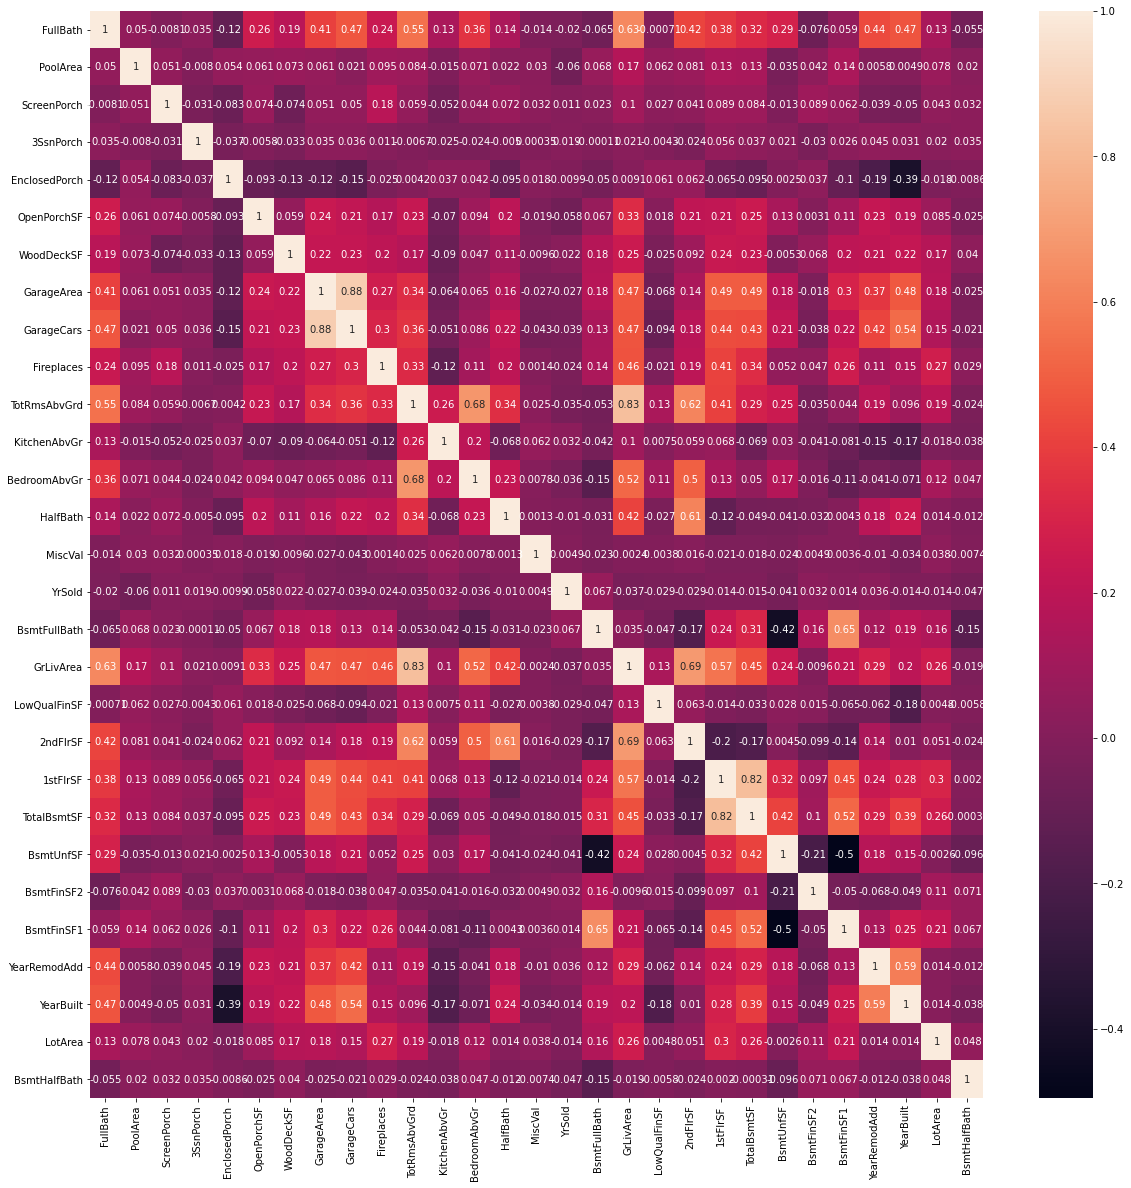

In [147]:
# calculate the correlation matrix
corr = data_sample_1.corr()
# plot the heatmap
plt.pyplot.figure(figsize=(20, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True)

In [148]:
data_sample_1.columns

Index(['FullBath', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch',
       'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars', 'Fireplaces',
       'TotRmsAbvGrd', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'MiscVal',
       'YrSold', 'BsmtFullBath', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF',
       '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1',
       'YearRemodAdd', 'YearBuilt', 'LotArea', 'BsmtHalfBath'],
      dtype='object')

In [149]:
del data_sample_1['1stFlrSF']

In [150]:
del data_sample_1['GarageCars']

In [151]:
data_sample_1.columns

Index(['FullBath', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch',
       'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'Fireplaces', 'TotRmsAbvGrd',
       'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'MiscVal', 'YrSold',
       'BsmtFullBath', 'GrLivArea', 'LowQualFinSF', '2ndFlrSF', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'YearRemodAdd', 'YearBuilt',
       'LotArea', 'BsmtHalfBath'],
      dtype='object')

## qual variables heatmap

<AxesSubplot:>

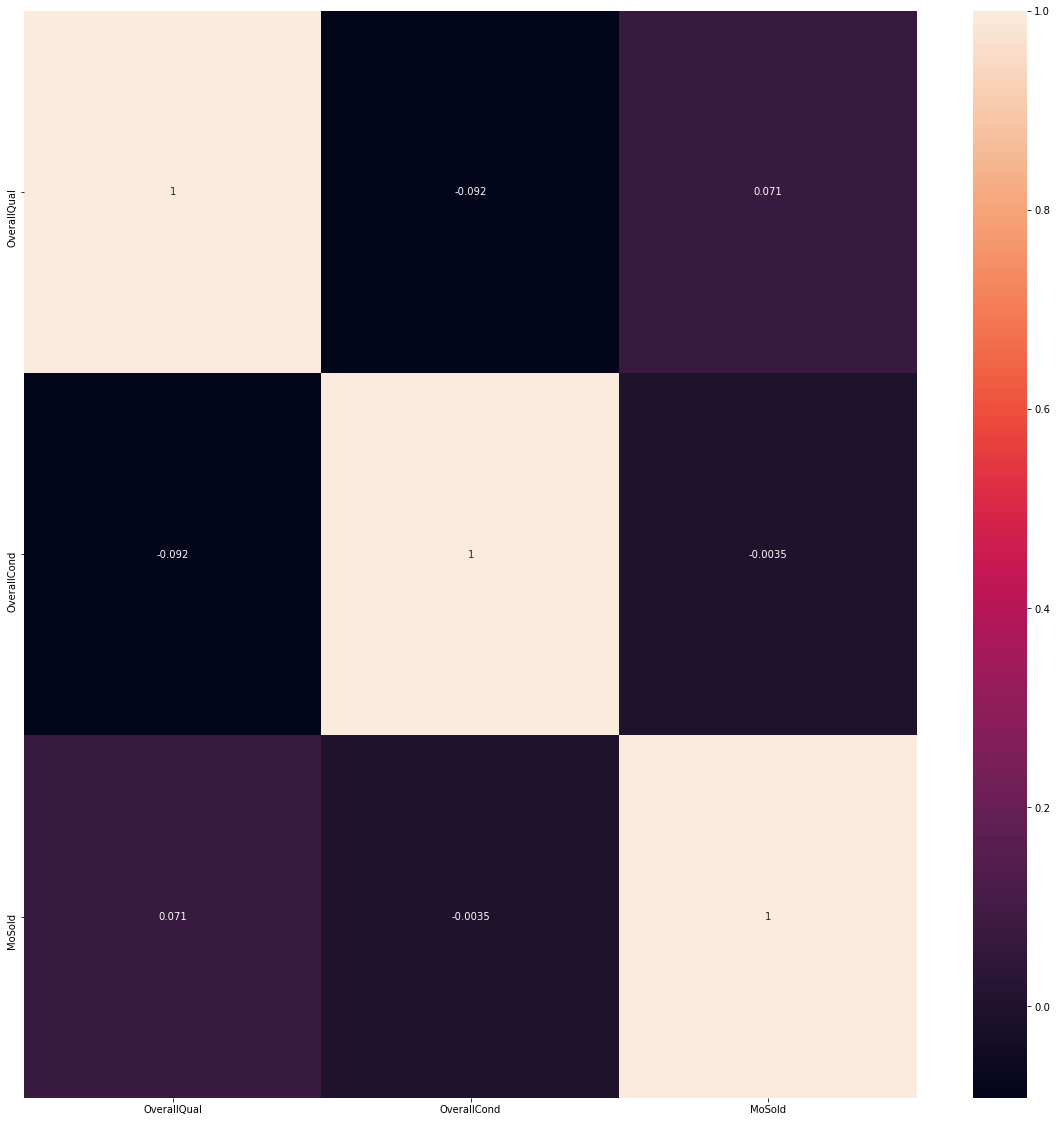

In [152]:
# calculate the correlation matrix
corr = data_sample_2.corr()
# plot the heatmap
plt.pyplot.figure(figsize=(20, 20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True)

# Model Training

In [153]:
features = x_data_final.columns.to_numpy()
target = ['SalePrice']
# Separating out the features
x = data_final.loc[:, features]
# Separating out the target
y = data_final.loc[:, target]

In [154]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.75, random_state=0)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

## Linear Reression 

In [155]:
regr_s = linear_model.LinearRegression()
regr_s.fit(x_train_scaled, y_train)
regr_s.score(x_test_scaled, y_test)

-1.719888548727512e+25

In [156]:
regr_s = linear_model.LinearRegression()
regr_s.fit(x_train, y_train)
regr_s.score(x_test, y_test)

0.616261980140865

In [163]:
sklearn.__version__

'0.24.1'

In [166]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_s.predict(x_test))))

0.3221684888347904

## Regression ridge

In [167]:
lrr = Ridge(alpha=0.1, max_iter=10000)
alphas = np.logspace(-6, 6, 200)

In [168]:
lrr.fit(x_train_scaled, y_train)
lrr.score(x_test_scaled, y_test)

0.7126494161356511

In [169]:
lrr.fit(x_train, y_train)
lrr.score(x_test, y_test)

0.6353298664557157

In [170]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrr.predict(x_test))))

0.26055784319925424

## Regression Lasso

In [176]:
lrl = linear_model.Lasso(alpha=0.1, max_iter=10000)

In [177]:
lrl.fit(x_train, y_train)
lrl.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55881487415.374756, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.6458633306975448

In [178]:
lrl.fit(x_train_scaled, y_train)
lrl.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19470575100.504395, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.7144178953519313

In [179]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrl.predict(x_test))))

6.790907258045929

## KNN Regressor

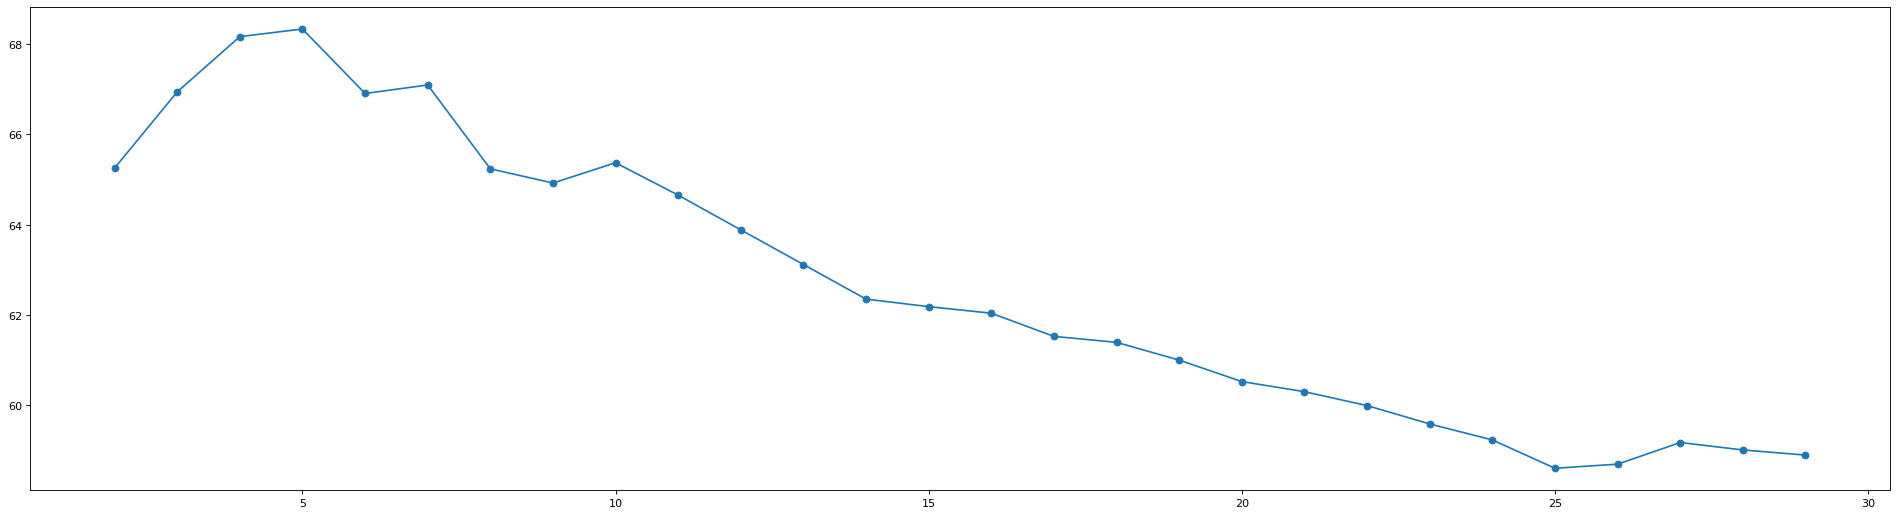

In [182]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((
        knn.fit(x_train, y_train).score(x_test, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

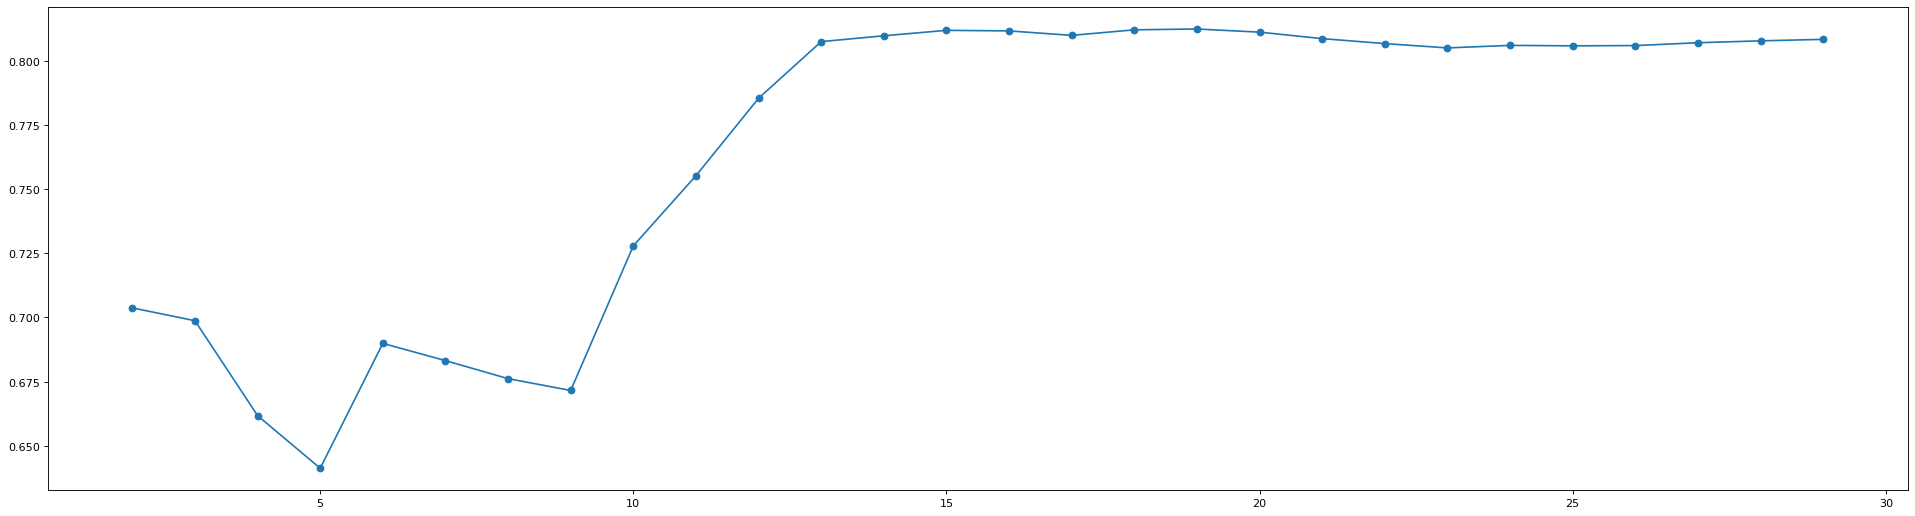

In [184]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    errors.append(np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(knn.predict(x_test)))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

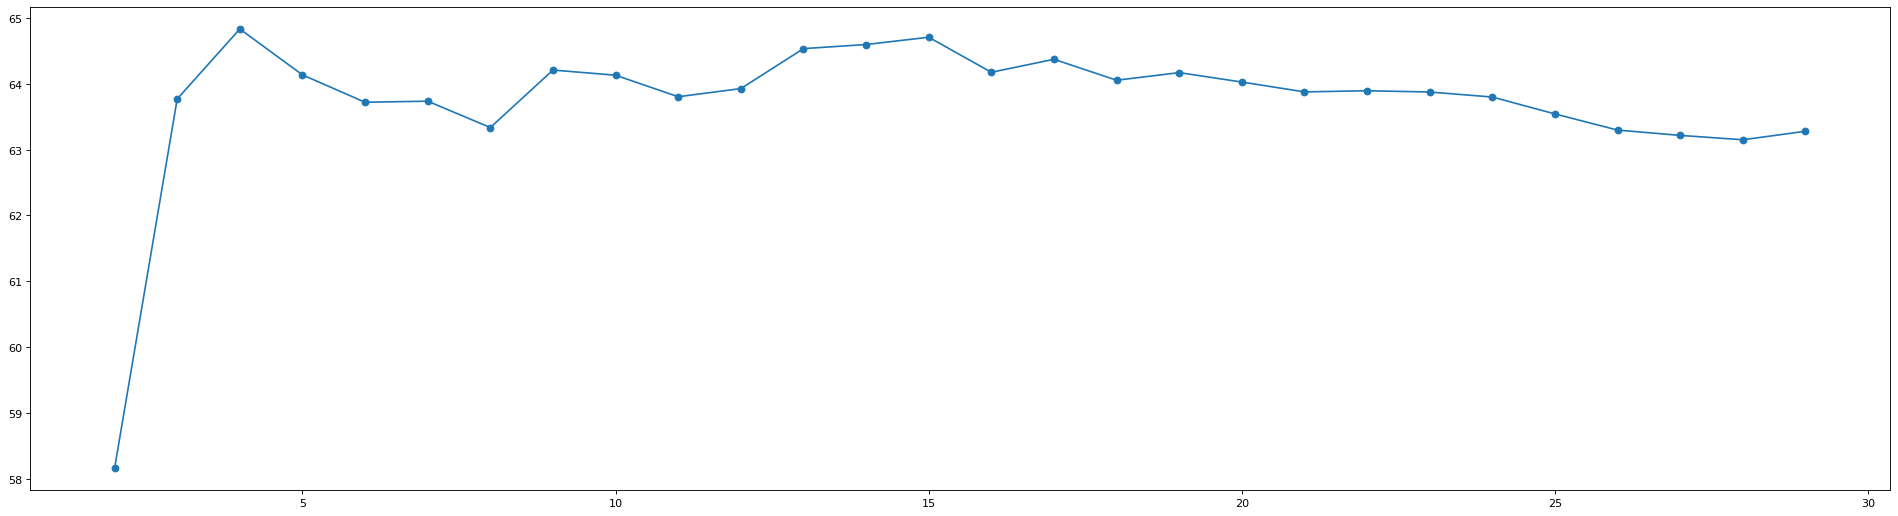

In [186]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((
        knn.fit(x_train_scaled, y_train).score(x_test_scaled, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

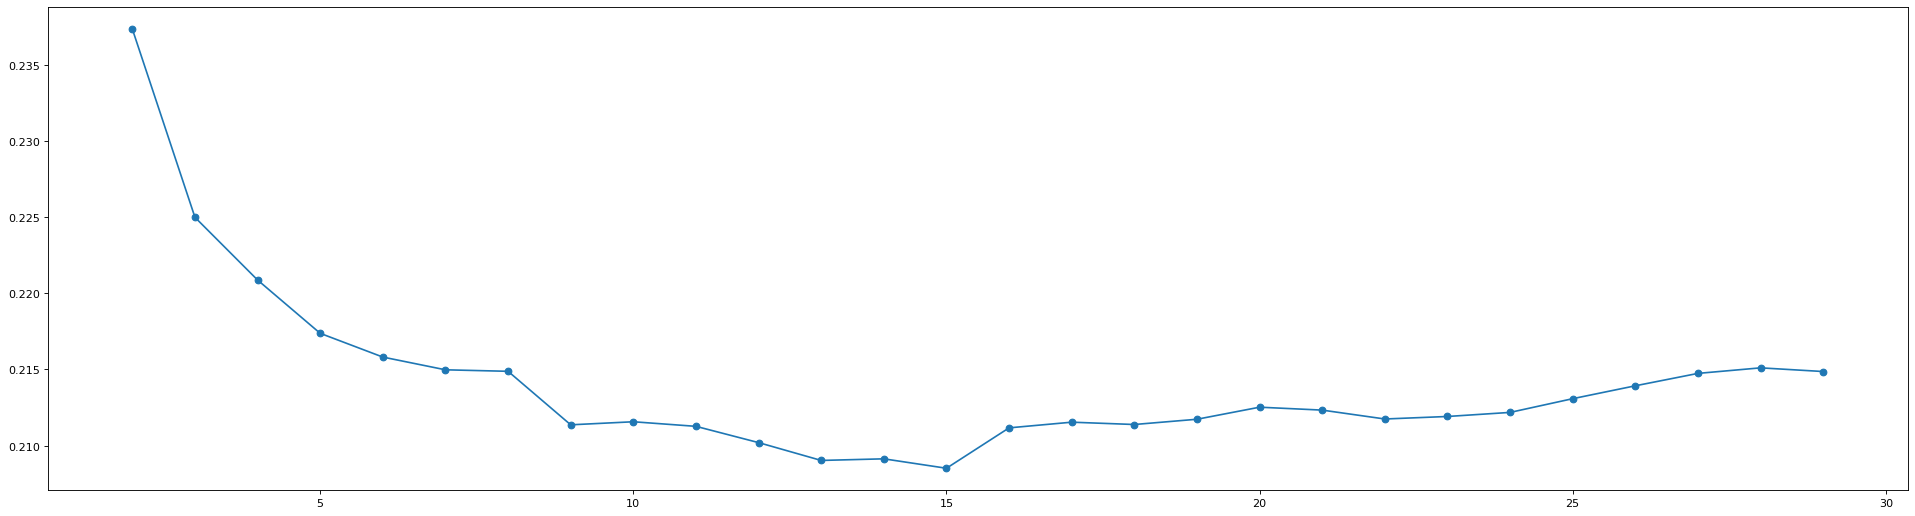

In [189]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    errors.append(np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(knn.predict(x_test_scaled)))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

### Random Forrest Regressor 

In [192]:
rdm = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rdm.fit(x_train_scaled, y_train)
rdm.score(x_test_scaled, y_test)

<ipython-input-192-83449e9522f2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train_scaled, y_train)


0.8578455142268878

In [193]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(rdm.predict(x_test_scaled))))

0.13506630295020258

In [194]:
rdm = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rdm.fit(x_train, y_train)
rdm.score(x_test, y_test)

<ipython-input-194-454ccf6fb374>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train, y_train)


0.8621764862386208

In [195]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(rdm.predict(x_test))))

0.1330793757261821

## SVR

In [202]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train_scaled, y_train)
regr_SVR.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.05411987878946234

In [203]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_SVR.predict(x_test_scaled))))

0.38675760404093723

In [204]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train, y_train)
regr_SVR.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.054320481529529285

In [205]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_SVR.predict(x_test))))

0.38679994093470926

## GBoost

In [206]:
est = GradientBoostingRegressor(n_estimators=1000)
est.fit(x_train_scaled, y_train)
est.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8948364286925362

In [207]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(est.predict(x_test_scaled))))

0.1258591690156028

In [208]:
est.fit(x_train, y_train)
est.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9030240578704847

In [209]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(est.predict(x_test))))

0.12429064846322453

## SGD EGRESSO 

In [210]:
reg_sgd = SGDRegressor(max_iter=1000, tol=1e-3)
reg_sgd.fit(x_train, y_train)
reg_sgd.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-2.996342475332292e+23

In [211]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(reg_sgd.predict(x_test))))

26.142738425417466

In [212]:
reg_sgd.fit(x_train_scaled, y_train)
reg_sgd.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-26.185432961884885

In [213]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(reg_sgd.predict(x_test_scaled))))

0.9883062257059518

## MLP

In [214]:
regr_mlp = MLPRegressor(random_state=1, max_iter=500)
regr_mlp.fit(x_train_scaled, y_train)
regr_mlp.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-3.738601115322653

In [215]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_mlp.predict(x_test_scaled))))

2.6926217370573466

In [216]:
regr_mlp.fit(x_train, y_train)
regr_mlp.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5411978762786802

In [217]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_mlp.predict(x_test))))

0.22358133662118715

## Best model

In [221]:
regressor = GradientBoostingRegressor(n_estimators=1000)
regressor.fit(x_train, y_train.values.ravel())
regressor.score(x_test, y_test.values.ravel())

0.907949895736635

In [222]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regressor.predict(x_test))))

0.122728609356567

In [223]:
regressor.fit(x_train_scaled, y_train.values.ravel())
regressor.score(x_test_scaled, y_test.values.ravel())

0.8881869552364157

In [224]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regressor.predict(x_test_scaled))))

0.12750400942626441

# Feature engineering

# multiplication

In [228]:
x_data_final['_OQuGLA'] = (x_data_final['OverallQual'] *
                           x_data_final['GrLivArea'])

## spreads

In [229]:
x_data_final['spread_YrSold_YearBuilt'] = (x_data_final['YrSold'] -
                                           x_data_final['YearBuilt'])
x_data_final['spread_YearRemodAdd_YearBuilt'] = (x_data_final['YearRemodAdd'] -
                                                 x_data_final['YearBuilt'])
x_data_final['spread_YrSold_YearRemodAdd'] = (x_data_final['YrSold'] -
                                              x_data_final['YearRemodAdd'])

## sums

In [230]:
x_data_final['sum_BsmtFinSF1_BsmtFinSF2'] = (x_data_final['BsmtFinSF1'] +
                                             x_data_final['BsmtFinSF2'])
x_data_final['sum_floor'] = (x_data_final['1stFlrSF'] +
                             x_data_final['LowQualFinSF'])
x_data_final['sum_BsmtFullBath_BsmtHalfBath'] = (x_data_final['BsmtFullBath'] +
                                                 x_data_final['BsmtHalfBath'])
x_data_final['sum_FullBath_HalfBath'] = (x_data_final['FullBath'] +
                                         x_data_final['HalfBath'])
x_data_final['TotBsmtBaths'] = (0 +
                                x_data_final['sum_BsmtFullBath_BsmtHalfBath'] +
                                x_data_final['sum_FullBath_HalfBath'])
x_data_final['sum_WoodDeckSF_OpenPorchSF'] = (
                                              x_data_final['WoodDeckSF'] +
                                              x_data_final['OpenPorchSF'])

x_data_final['sum_OCPORCH'] = (
                                                 x_data_final['OpenPorchSF'] +
                                                 x_data_final['EnclosedPorch'])
x_data_final['sum_OpenPorchSF_EnclosedPorch'] = (
                                                 x_data_final['OpenPorchSF'] +
                                                 x_data_final['EnclosedPorch'])

In [231]:
x_data_final['TotAllTypePORCH'] = (x_data_final['OpenPorchSF'] +
                                   x_data_final['EnclosedPorch'] +
                                   x_data_final['3SsnPorch'] +
                                   x_data_final['ScreenPorch'])

## ,percent

In [232]:
x_data_final['%_BsmtFinSF1_TotalBsmtSF'] = (x_data_final['BsmtFinSF1'] /
                                            x_data_final['TotalBsmtSF'])
x_data_final['%_BsmtFinSF2_TotalBsmtSF'] = (x_data_final['BsmtFinSF2'] /
                                            x_data_final['TotalBsmtSF'])
x_data_final['%_BsmtUnfSF_TotalBsmtSF'] = (x_data_final['BsmtUnfSF'] /
                                           x_data_final['TotalBsmtSF'])
x_data_final['%_TotalBsmtSF_LotArea'] = (x_data_final['TotalBsmtSF'] /
                                         x_data_final['LotArea'])
x_data_final['%_GrLivArea_LotArea'] = (x_data_final['GrLivArea'] /
                                       x_data_final['LotArea'])
x_data_final['%_Bedroom_TotRms'] = (
                                    x_data_final['BedroomAbvGr'] /
                                    x_data_final['TotRmsAbvGrd'])
x_data_final['%_KitchenAbvGr_TotRmsAbvGrd'] = (
                                               x_data_final['KitchenAbvGr'] /
                                               x_data_final['TotRmsAbvGrd'])
x_data_final['%_KitchenAbvGr_BedroomAbvGr'] = (
                                               x_data_final['KitchenAbvGr'] /
                                               x_data_final['BedroomAbvGr'])
x_data_final['%_LowQualFinSF_sum_1stFlrSF'] = (
                                               x_data_final['LowQualFinSF'] /
                                               x_data_final['1stFlrSF'])
x_data_final['%_Fireplaces_TotRms'] = (
                                       x_data_final['Fireplaces'] /
                                       x_data_final['TotRmsAbvGrd'])
x_data_final['%_OpenPorch_TotAllTypePORCH'] = (
                                               x_data_final['OpenPorchSF'] /
                                               x_data_final['TotAllTypePORCH'])
x_data_final['%_EnclosedP_TotAllTypePORCH'] = (
                                               x_data_final['EnclosedPorch'] /
                                               x_data_final['TotAllTypePORCH'])
x_data_final['%_3SsnPorch_TotAllTypePORCH'] = (
                                               x_data_final['3SsnPorch'] /
                                               x_data_final['TotAllTypePORCH'])
x_data_final['%_ScreenPo_TotAllTypePORCH'] = (
                                              x_data_final['ScreenPorch'] /
                                              x_data_final['TotAllTypePORCH'])
x_data_final['%_GrLivArea_sum_1stFlr_LowQualFi'] = (
                                                    x_data_final['GrLivArea'] /
                                                    x_data_final['sum_floor'])
x_data_final['%_OpenPorchSF_sum_OCPORCH'] = (
                                             x_data_final['OpenPorchSF'] /
                                             x_data_final['sum_OCPORCH'])
x_data_final['%_EnclosedPorch_sum_OCPORCH'] = (
                                               x_data_final['EnclosedPorch'] /
                                               x_data_final['sum_OCPORCH'])
x_data_final['%_3SsnPorch_sum_sum_OCPORCH'] = (
                                               x_data_final['3SsnPorch'] /
                                               x_data_final['sum_OCPORCH'])
x_data_final['%_ScreenPorch_sum_sum_OCPORCH'] = (
                                                 x_data_final['ScreenPorch'] /
                                                 x_data_final['sum_OCPORCH'])

In [233]:
x_data_final

,FullBath,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,...,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_EnclosedP_TotAllTypePORCH,%_3SsnPorch_TotAllTypePORCH,%_ScreenPo_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi,%_OpenPorchSF_sum_OCPORCH,%_EnclosedPorch_sum_OCPORCH,%_3SsnPorch_sum_sum_OCPORCH,%_ScreenPorch_sum_sum_OCPORCH
Id,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,61,0,548,2,0,...,0.000000,1.000000,0.000000,0.0,0.0,1.997664,1.000000,0.000000,0.0,0.0
2,2,0,0,0,0,0,298,460,2,1,...,0.166667,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
3,2,0,0,0,0,42,0,608,2,1,...,0.166667,1.000000,0.000000,0.0,0.0,1.941304,1.000000,0.000000,0.0,0.0
4,1,0,0,0,272,35,0,642,3,1,...,0.142857,0.114007,0.885993,0.0,0.0,1.786681,0.114007,0.885993,0.0,0.0
5,2,0,0,0,0,84,192,836,3,1,...,0.111111,1.000000,0.000000,0.0,0.0,1.919651,1.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2,0,0,0,0,40,0,460,2,1,...,0.142857,1.000000,0.000000,0.0,0.0,1.728227,1.000000,0.000000,0.0,0.0
1457,2,0,0,0,0,0,349,500,2,2,...,0.285714,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
1458,2,0,0,0,0,60,0,252,1,2,...,0.222222,1.000000,0.000000,0.0,0.0,1.969697,1.000000,0.000000,0.0,0.0


In [234]:
x_data_final = x_data_final.fillna(0)
x_data_final.replace(np.inf, 0, inplace=True)
x_data_final.describe()

,FullBath,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,...,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_EnclosedP_TotAllTypePORCH,%_3SsnPorch_TotAllTypePORCH,%_ScreenPo_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi,%_OpenPorchSF_sum_OCPORCH,%_EnclosedPorch_sum_OCPORCH,%_3SsnPorch_sum_sum_OCPORCH,%_ScreenPorch_sum_sum_OCPORCH
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.565068,2.758904,15.060959,3.409589,21.954110,46.660274,94.244521,472.980137,1.767123,0.613014,...,0.091567,0.483553,0.124534,0.013535,0.064680,1.356483,0.521354,0.127276,0.044532,0.162339
std,0.550916,40.177307,55.757415,29.317331,61.119149,66.256028,125.338794,213.804841,0.747315,0.644666,...,0.100467,0.481390,0.315828,0.106714,0.227132,0.444028,0.491343,0.320711,0.563486,0.996459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,480.000000,2.000000,1.000000,...,0.105556,0.291935,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,68.000000,168.000000,576.000000,2.000000,1.000000,...,0.166667,1.000000,0.000000,0.000000,0.000000,1.783578,1.000000,0.000000,0.000000,0.000000
max,3.000000,738.000000,480.000000,508.000000,552.000000,547.000000,857.000000,1418.000000,4.000000,3.000000,...,0.500000,1.000000,1.000000,1.000000,1.000000,3.882828,1.000000,1.000000,14.941176,19.800000


# Model Training

In [235]:
features_v2 = x_data_final.columns.to_numpy()
target = ['SalePrice']
# Separating out the features
x = x_data_final.loc[:, features_v2]
# Separating out the target
y = data_final.loc[:, target]

In [236]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.75, random_state=0)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

## Linear Reression 

In [237]:
regr_s = linear_model.LinearRegression()
regr_s.fit(x_train, y_train)
regr_s.score(x_test, y_test)

0.36787717545644827

In [238]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_s.predict(x_test))))

0.3805614240017454

## Regression ridge

In [240]:
lrr = Ridge(alpha=0.1, max_iter=10000)
alphas = np.logspace(-6, 6, 200)

In [241]:
lrr.fit(x_train_scaled, y_train)
lrr.score(x_test_scaled, y_test)

0.5685794952127662

In [242]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrr.predict(x_test_scaled))))

0.2020518772177563

In [243]:
lrr.fit(x_train, y_train)
lrr.score(x_test, y_test)

0.4329559883819637

In [244]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrr.predict(x_test))))

0.2688590628427912

## Regression Lasso

In [245]:
from sklearn import linear_model
lrl = linear_model.Lasso(alpha=0.1, max_iter=10000)

In [246]:
lrl.fit(x_train, y_train)
lrl.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191141879102.56992, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.39606343015703693

In [247]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrl.predict(x_test))))

0.1853833114615162

In [248]:
lrl.fit(x_train_scaled, y_train)
lrl.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126814388673.86829, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.5626375155568124

In [249]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrl.predict(x_test_scaled))))

0.206012396909975

## KNN Regressor

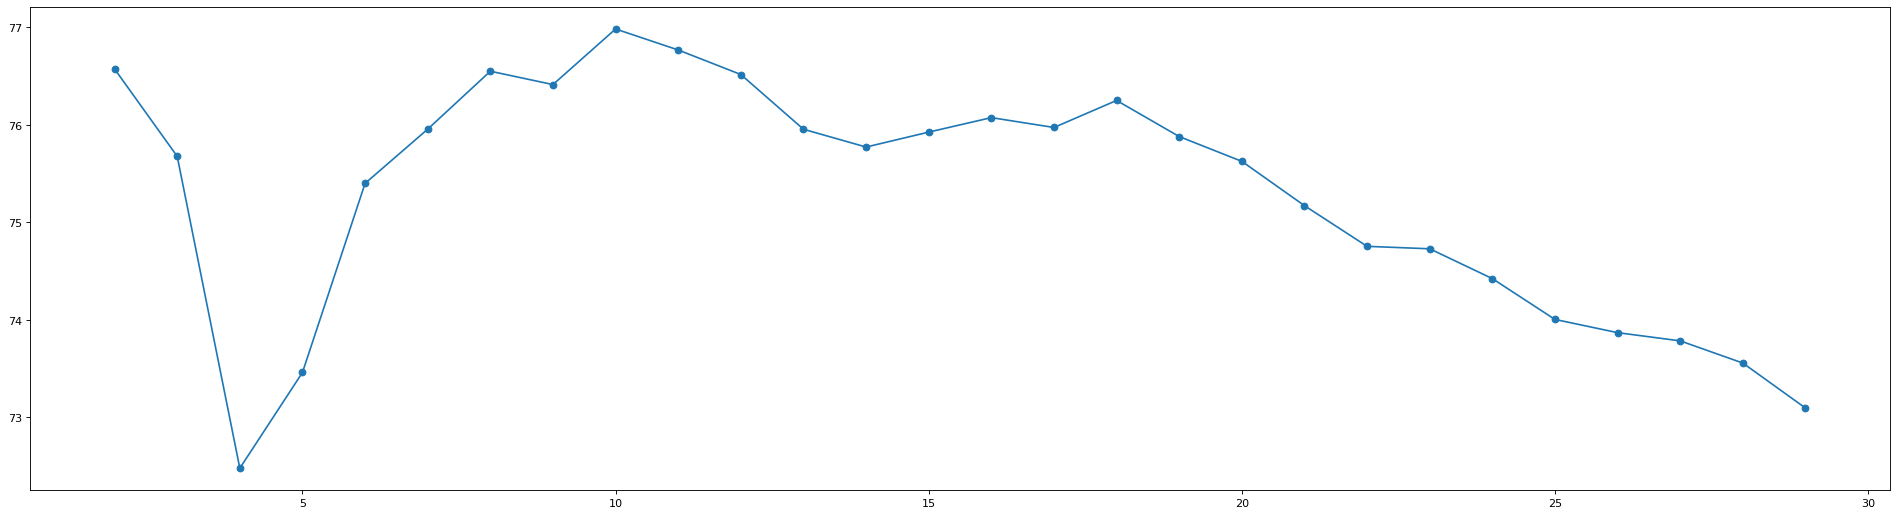

In [250]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((
        knn.fit(x_train, y_train).score(x_test, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

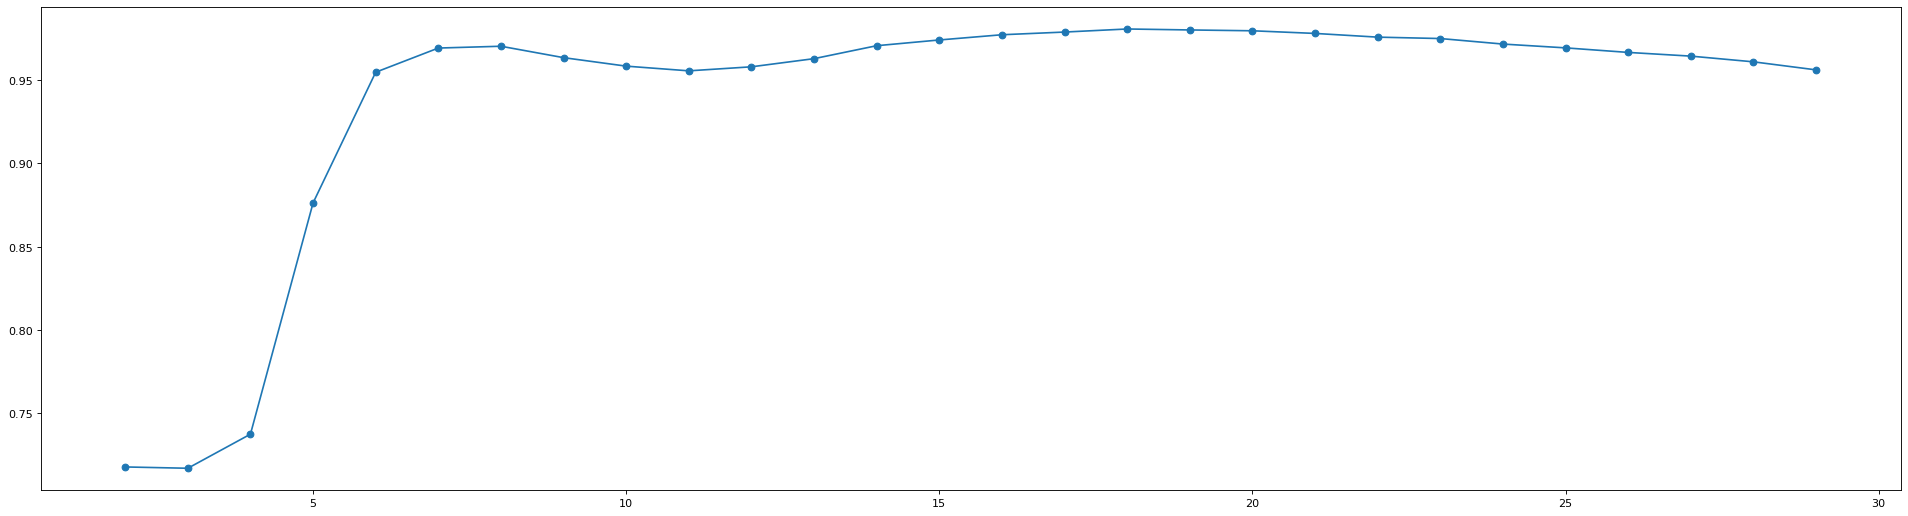

In [251]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    errors.append(np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(knn.predict(x_test)))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

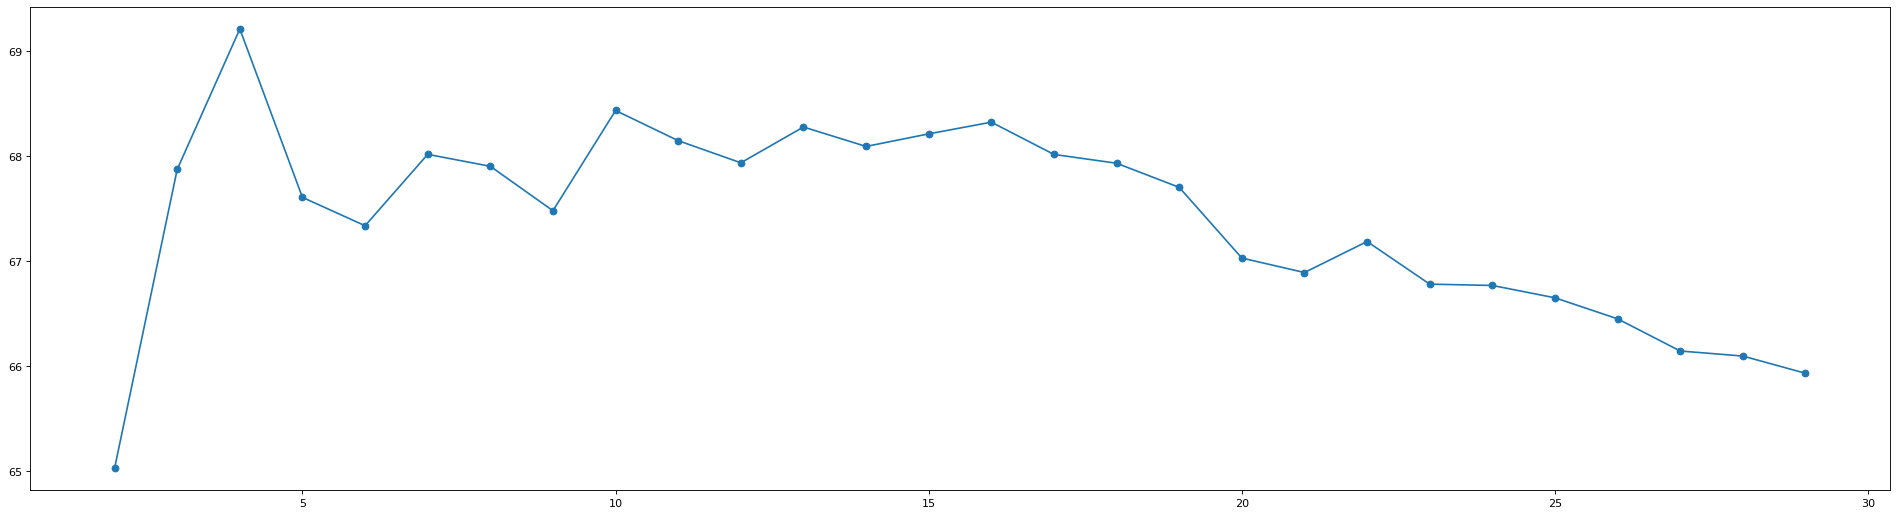

In [252]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((knn.fit(
        x_train_scaled, y_train).score(x_test_scaled, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

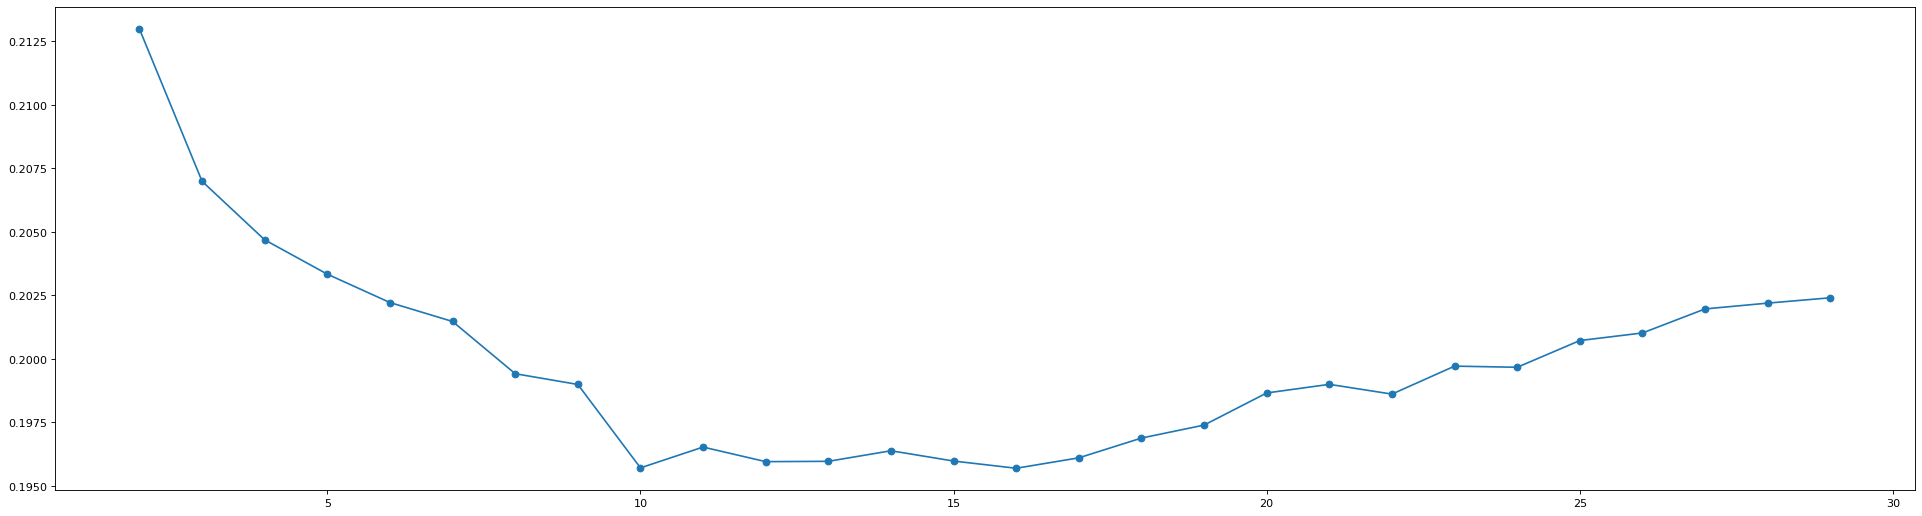

In [253]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    errors.append(np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(knn.predict(x_test_scaled)))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

### Random Forrest Regressor 

In [254]:
rdm = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rdm.fit(x_train_scaled, y_train)
rdm.score(x_test_scaled, y_test)

<ipython-input-254-83449e9522f2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train_scaled, y_train)


0.8465662716141742

In [255]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(rdm.predict(x_test_scaled))))

0.13923773809787918

In [256]:
rdm = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rdm.fit(x_train, y_train)
rdm.score(x_test, y_test)

<ipython-input-256-454ccf6fb374>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train, y_train)


0.8526310480040853

In [257]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(rdm.predict(x_test))))

0.13764553300458826

## SVR

In [262]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train_scaled, y_train)
regr_SVR.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.054039963513360156

In [263]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_SVR.predict(x_test_scaled))))

0.38673708300828147

In [264]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train, y_train)
regr_SVR.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.05309962401677337

In [265]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_SVR.predict(x_test))))

0.3865083466065092

## GBoost

In [266]:
est = GradientBoostingRegressor(n_estimators=1000,
                                learning_rate=0.1, max_depth=1)
est.fit(x_train_scaled, y_train)
est.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9123274405832982

In [267]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(est.predict(x_test_scaled))))

0.12598249684355664

In [268]:
est.fit(x_train, y_train)
est.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9162173383082686

In [269]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(est.predict(x_test))))

0.1271542334324494

## SGD EGRESSO 

In [271]:
reg_sgd = SGDRegressor(max_iter=1000, tol=1e-3)
reg_sgd.fit(x_train, y_train)
reg_sgd.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-3.8888425126914265e+24

In [272]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(reg_sgd.predict(x_test))))

27.254679010016677

In [273]:
reg_sgd.fit(x_train_scaled, y_train)
reg_sgd.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-106.40894636307286

In [274]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(reg_sgd.predict(x_test_scaled))))

1.172945138484799

## MLP

In [276]:
regr_mlp = MLPRegressor(random_state=1, max_iter=500)
regr_mlp.fit(x_train_scaled, y_train)
regr_mlp.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-3.3933429938078907

In [277]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_mlp.predict(x_test_scaled))))

2.5963369426509866

In [278]:
regr_mlp.fit(x_train, y_train)
regr_mlp.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6011114729554679

In [279]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_mlp.predict(x_test))))

0.17600215902831054

# best model

In [285]:
regressor = GradientBoostingRegressor(n_estimators=1000)
regressor.fit(x_train, y_train.values.ravel())
regressor.score(x_test, y_test.values.ravel())

0.8847565579369195

In [286]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regressor.predict(x_test))))

0.1292650136723197

In [287]:
regressor.fit(x_train_scaled, y_train.values.ravel())
regressor.score(x_test_scaled, y_test.values.ravel())

0.8871950921781022

In [288]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regressor.predict(x_test_scaled))))

0.12404886993618945

# Test data

# Feature Selection 

## Removing low variance features 

In [289]:
x_data_final

,FullBath,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,...,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_EnclosedP_TotAllTypePORCH,%_3SsnPorch_TotAllTypePORCH,%_ScreenPo_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi,%_OpenPorchSF_sum_OCPORCH,%_EnclosedPorch_sum_OCPORCH,%_3SsnPorch_sum_sum_OCPORCH,%_ScreenPorch_sum_sum_OCPORCH
Id,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,61,0,548,2,0,...,0.000000,1.000000,0.000000,0.0,0.0,1.997664,1.000000,0.000000,0.0,0.0
2,2,0,0,0,0,0,298,460,2,1,...,0.166667,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0
3,2,0,0,0,0,42,0,608,2,1,...,0.166667,1.000000,0.000000,0.0,0.0,1.941304,1.000000,0.000000,0.0,0.0
4,1,0,0,0,272,35,0,642,3,1,...,0.142857,0.114007,0.885993,0.0,0.0,1.786681,0.114007,0.885993,0.0,0.0
5,2,0,0,0,0,84,192,836,3,1,...,0.111111,1.000000,0.000000,0.0,0.0,1.919651,1.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2,0,0,0,0,40,0,460,2,1,...,0.142857,1.000000,0.000000,0.0,0.0,1.728227,1.000000,0.000000,0.0,0.0
1457,2,0,0,0,0,0,349,500,2,2,...,0.285714,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0
1458,2,0,0,0,0,60,0,252,1,2,...,0.222222,1.000000,0.000000,0.0,0.0,1.969697,1.000000,0.000000,0.0,0.0


In [290]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.001)
X_new = sel.fit_transform(x_data_final)
X_new.shape

(1460, 217)

In [291]:
X_new

array([[2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [292]:
support = sel.get_support(indices=True)

In [293]:
feature_names = np.array(x.columns)
feature_names

array(['FullBath', 'PoolArea', 'ScreenPorch', '3SsnPorch',
       'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea',
       'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr',
       'BedroomAbvGr', 'HalfBath', 'MiscVal', 'YrSold', 'BsmtFullBath',
       'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'YearRemodAdd',
       'YearBuilt', 'LotArea', 'BsmtHalfBath', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
       'KitchenQual', 'MoSold', 'MSSubClass', 'PavedDrive_N',
       'PavedDrive_P', 'PavedDrive_Y', 'Functional_Maj1',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'CentralAir_N', 'CentralAir_Y', 'Heating_Floor', 'Heating_GasA',
       'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundati

In [294]:
selected_features1 = feature_names[support]

In [295]:
X_new_df = pd.DataFrame(X_new, columns=selected_features1, index=x.index)
X_new_df

,FullBath,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,...,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_EnclosedP_TotAllTypePORCH,%_3SsnPorch_TotAllTypePORCH,%_ScreenPo_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi,%_OpenPorchSF_sum_OCPORCH,%_EnclosedPorch_sum_OCPORCH,%_3SsnPorch_sum_sum_OCPORCH,%_ScreenPorch_sum_sum_OCPORCH
Id,,,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,0.0,0.0,0.0,61.0,0.0,548.0,2.0,0.0,...,0.000000,1.000000,0.000000,0.0,0.0,1.997664,1.000000,0.000000,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,298.0,460.0,2.0,1.0,...,0.166667,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,42.0,0.0,608.0,2.0,1.0,...,0.166667,1.000000,0.000000,0.0,0.0,1.941304,1.000000,0.000000,0.0,0.0
4,1.0,0.0,0.0,0.0,272.0,35.0,0.0,642.0,3.0,1.0,...,0.142857,0.114007,0.885993,0.0,0.0,1.786681,0.114007,0.885993,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,84.0,192.0,836.0,3.0,1.0,...,0.111111,1.000000,0.000000,0.0,0.0,1.919651,1.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2.0,0.0,0.0,0.0,0.0,40.0,0.0,460.0,2.0,1.0,...,0.142857,1.000000,0.000000,0.0,0.0,1.728227,1.000000,0.000000,0.0,0.0
1457,2.0,0.0,0.0,0.0,0.0,0.0,349.0,500.0,2.0,2.0,...,0.285714,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0
1458,2.0,0.0,0.0,0.0,0.0,60.0,0.0,252.0,1.0,2.0,...,0.222222,1.000000,0.000000,0.0,0.0,1.969697,1.000000,0.000000,0.0,0.0


## Univariate Feature selection 

In [296]:
from sklearn.feature_selection import SelectPercentile, chi2

In [297]:
sel2 = SelectPercentile(percentile=50)
X_new2 = sel2.fit_transform(X_new, y.values.ravel())
X_new2.shape

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(1460, 108)

In [298]:
X_new2

array([[  2.        ,  61.        ,   0.        , ...,   1.        ,
          1.99766355,   1.        ],
       [  2.        ,   0.        , 298.        , ...,   0.        ,
          1.        ,   0.        ],
       [  2.        ,  42.        ,   0.        , ...,   1.        ,
          1.94130435,   1.        ],
       ...,
       [  2.        ,  60.        ,   0.        , ...,   1.        ,
          1.96969697,   1.        ],
       [  1.        ,   0.        , 366.        , ...,   0.        ,
          1.        ,   0.        ],
       [  1.        ,  68.        , 736.        , ...,   1.        ,
          1.        ,   1.        ]])

In [299]:
support = sel2.get_support(indices=True)

In [300]:
feature_names2 = np.array(X_new_df.columns)
feature_names2

array(['FullBath', 'PoolArea', 'ScreenPorch', '3SsnPorch',
       'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea',
       'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'KitchenAbvGr',
       'BedroomAbvGr', 'HalfBath', 'MiscVal', 'YrSold', 'BsmtFullBath',
       'GrLivArea', 'LowQualFinSF', '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF',
       'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'YearRemodAdd',
       'YearBuilt', 'LotArea', 'BsmtHalfBath', 'OverallQual',
       'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
       'KitchenQual', 'MoSold', 'MSSubClass', 'PavedDrive_N',
       'PavedDrive_P', 'PavedDrive_Y', 'Functional_Maj1',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod', 'Functional_Typ', 'CentralAir_N', 'CentralAir_Y',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foun

In [301]:
selected_features2 = feature_names2[support]

In [302]:
X_new2_df = pd.DataFrame(X_new2,
                         columns=selected_features2, index=X_new_df.index)
X_new2_df

,FullBath,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,TotRmsAbvGrd,BedroomAbvGr,HalfBath,MiscVal,...,TotAllTypePORCH,%_BsmtFinSF1_TotalBsmtSF,%_BsmtUnfSF_TotalBsmtSF,%_Bedroom_TotRms,%_KitchenAbvGr_TotRmsAbvGrd,%_KitchenAbvGr_BedroomAbvGr,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi,%_OpenPorchSF_sum_OCPORCH
Id,,,,,,,,,,,,,,,,,,,,,
1,2.0,61.0,0.0,548.0,2.0,0.0,8.0,3.0,1.0,0.0,...,61.0,0.824766,0.175234,0.375000,0.125000,0.333333,0.000000,1.000000,1.997664,1.000000
2,2.0,0.0,298.0,460.0,2.0,1.0,6.0,3.0,0.0,0.0,...,0.0,0.774960,0.225040,0.500000,0.166667,0.333333,0.166667,0.000000,1.000000,0.000000
3,2.0,42.0,0.0,608.0,2.0,1.0,6.0,3.0,1.0,0.0,...,42.0,0.528261,0.471739,0.500000,0.166667,0.333333,0.166667,1.000000,1.941304,1.000000
4,1.0,35.0,0.0,642.0,3.0,1.0,7.0,3.0,0.0,0.0,...,307.0,0.285714,0.714286,0.428571,0.142857,0.333333,0.142857,0.114007,1.786681,0.114007
5,2.0,84.0,192.0,836.0,3.0,1.0,9.0,4.0,1.0,0.0,...,84.0,0.572052,0.427948,0.444444,0.111111,0.250000,0.111111,1.000000,1.919651,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2.0,40.0,0.0,460.0,2.0,1.0,7.0,3.0,1.0,0.0,...,40.0,0.000000,1.000000,0.428571,0.142857,0.333333,0.142857,1.000000,1.728227,1.000000
1457,2.0,0.0,349.0,500.0,2.0,2.0,7.0,3.0,0.0,0.0,...,0.0,0.512322,0.381971,0.428571,0.142857,0.333333,0.285714,0.000000,1.000000,0.000000
1458,2.0,60.0,0.0,252.0,1.0,2.0,9.0,4.0,0.0,2500.0,...,60.0,0.238715,0.761285,0.444444,0.111111,0.250000,0.222222,1.000000,1.969697,1.000000


## Recursive Feature Elimination 

In [303]:
from sklearn.feature_selection import RFE

In [304]:
rdm = GradientBoostingRegressor(n_estimators=1000)
rfe = RFE(estimator = rdm)
rfe.fit(X_new2, y)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

RFE(estimator=GradientBoostingRegressor(n_estimators=1000))

In [305]:
X_new_final = rfe.transform(X_new2)

In [306]:
X_new_final

array([[6.10000000e+01, 0.00000000e+00, 5.48000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 1.99766355e+00],
       [0.00000000e+00, 2.98000000e+02, 4.60000000e+02, ...,
        1.66666667e-01, 0.00000000e+00, 1.00000000e+00],
       [4.20000000e+01, 0.00000000e+00, 6.08000000e+02, ...,
        1.66666667e-01, 1.00000000e+00, 1.94130435e+00],
       ...,
       [6.00000000e+01, 0.00000000e+00, 2.52000000e+02, ...,
        2.22222222e-01, 1.00000000e+00, 1.96969697e+00],
       [0.00000000e+00, 3.66000000e+02, 2.40000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [6.80000000e+01, 7.36000000e+02, 2.76000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [307]:
support = rfe.get_support(indices=True)

In [308]:
feature_names3 = np.array(X_new2_df.columns)
feature_names3

array(['FullBath', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea',
       'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr',
       'HalfBath', 'MiscVal', 'BsmtFullBath', 'GrLivArea', '2ndFlrSF',
       '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1',
       'YearRemodAdd', 'YearBuilt', 'LotArea', 'OverallQual',
       'OverallCond', 'ExterQual', 'HeatingQC', 'KitchenQual',
       'PavedDrive_N', 'Functional_Mod', 'CentralAir_N', 'CentralAir_Y',
       'Heating_Grav', 'Heating_Wall', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd', 'Exterior1st_CemntBd', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'SaleType_Con', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'BldgType_TwnhsE',
       'Roof

In [309]:
selected_features3 = feature_names3[support]

In [310]:
X_new_final_df = pd.DataFrame(X_new_final,
                              columns=selected_features3,
                              index=X_new2_df.index)
X_new_final_df

,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,2ndFlrSF,1stFlrSF,...,sum_OpenPorchSF_EnclosedPorch,TotAllTypePORCH,%_BsmtFinSF1_TotalBsmtSF,%_BsmtUnfSF_TotalBsmtSF,%_Bedroom_TotRms,%_KitchenAbvGr_TotRmsAbvGrd,%_KitchenAbvGr_BedroomAbvGr,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi
Id,,,,,,,,,,,,,,,,,,,,,
1,61.0,0.0,548.0,2.0,0.0,8.0,3.0,1710.0,854.0,856.0,...,61.0,61.0,0.824766,0.175234,0.375000,0.125000,0.333333,0.000000,1.000000,1.997664
2,0.0,298.0,460.0,2.0,1.0,6.0,3.0,1262.0,0.0,1262.0,...,0.0,0.0,0.774960,0.225040,0.500000,0.166667,0.333333,0.166667,0.000000,1.000000
3,42.0,0.0,608.0,2.0,1.0,6.0,3.0,1786.0,866.0,920.0,...,42.0,42.0,0.528261,0.471739,0.500000,0.166667,0.333333,0.166667,1.000000,1.941304
4,35.0,0.0,642.0,3.0,1.0,7.0,3.0,1717.0,756.0,961.0,...,307.0,307.0,0.285714,0.714286,0.428571,0.142857,0.333333,0.142857,0.114007,1.786681
5,84.0,192.0,836.0,3.0,1.0,9.0,4.0,2198.0,1053.0,1145.0,...,84.0,84.0,0.572052,0.427948,0.444444,0.111111,0.250000,0.111111,1.000000,1.919651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,40.0,0.0,460.0,2.0,1.0,7.0,3.0,1647.0,694.0,953.0,...,40.0,40.0,0.000000,1.000000,0.428571,0.142857,0.333333,0.142857,1.000000,1.728227
1457,0.0,349.0,500.0,2.0,2.0,7.0,3.0,2073.0,0.0,2073.0,...,0.0,0.0,0.512322,0.381971,0.428571,0.142857,0.333333,0.285714,0.000000,1.000000
1458,60.0,0.0,252.0,1.0,2.0,9.0,4.0,2340.0,1152.0,1188.0,...,60.0,60.0,0.238715,0.761285,0.444444,0.111111,0.250000,0.222222,1.000000,1.969697


In [311]:
X_new_final_df.columns.values

array(['OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageCars',
       'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GrLivArea',
       '2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1',
       'YearRemodAdd', 'YearBuilt', 'LotArea', 'OverallQual',
       'OverallCond', 'ExterQual', 'HeatingQC', 'KitchenQual',
       'CentralAir_N', 'CentralAir_Y', 'Exterior2nd_VinylSd',
       'SaleType_New', 'MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LandSlope_Gtl', 'Neighborhood_Crawfor',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'SaleCondition_Normal',
       'SaleCondition_Partial', '_OQuGLA', 'spread_YrSold_YearBuilt',
       'spread_YrSold_YearRemodAdd', 'sum_BsmtFinSF1_BsmtFinSF2',
       'sum_floor', 'TotBsmtBaths', 'sum_WoodDeckSF_OpenPorchSF',
       'sum_OCPORCH', 'sum_OpenPorchSF_EnclosedPorch', 'TotAllTypePORCH',
       '%_BsmtFinSF1_TotalBsmtSF', '%_BsmtUnfSF_TotalBsmtSF',
       '%_Bedroom_To

In [312]:
X_new_final_df

,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,2ndFlrSF,1stFlrSF,...,sum_OpenPorchSF_EnclosedPorch,TotAllTypePORCH,%_BsmtFinSF1_TotalBsmtSF,%_BsmtUnfSF_TotalBsmtSF,%_Bedroom_TotRms,%_KitchenAbvGr_TotRmsAbvGrd,%_KitchenAbvGr_BedroomAbvGr,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi
Id,,,,,,,,,,,,,,,,,,,,,
1,61.0,0.0,548.0,2.0,0.0,8.0,3.0,1710.0,854.0,856.0,...,61.0,61.0,0.824766,0.175234,0.375000,0.125000,0.333333,0.000000,1.000000,1.997664
2,0.0,298.0,460.0,2.0,1.0,6.0,3.0,1262.0,0.0,1262.0,...,0.0,0.0,0.774960,0.225040,0.500000,0.166667,0.333333,0.166667,0.000000,1.000000
3,42.0,0.0,608.0,2.0,1.0,6.0,3.0,1786.0,866.0,920.0,...,42.0,42.0,0.528261,0.471739,0.500000,0.166667,0.333333,0.166667,1.000000,1.941304
4,35.0,0.0,642.0,3.0,1.0,7.0,3.0,1717.0,756.0,961.0,...,307.0,307.0,0.285714,0.714286,0.428571,0.142857,0.333333,0.142857,0.114007,1.786681
5,84.0,192.0,836.0,3.0,1.0,9.0,4.0,2198.0,1053.0,1145.0,...,84.0,84.0,0.572052,0.427948,0.444444,0.111111,0.250000,0.111111,1.000000,1.919651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,40.0,0.0,460.0,2.0,1.0,7.0,3.0,1647.0,694.0,953.0,...,40.0,40.0,0.000000,1.000000,0.428571,0.142857,0.333333,0.142857,1.000000,1.728227
1457,0.0,349.0,500.0,2.0,2.0,7.0,3.0,2073.0,0.0,2073.0,...,0.0,0.0,0.512322,0.381971,0.428571,0.142857,0.333333,0.285714,0.000000,1.000000
1458,60.0,0.0,252.0,1.0,2.0,9.0,4.0,2340.0,1152.0,1188.0,...,60.0,60.0,0.238715,0.761285,0.444444,0.111111,0.250000,0.222222,1.000000,1.969697


In [313]:
x_selected_features = pd.DataFrame(X_new_final_df)

In [314]:
x_selected_features

,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,Fireplaces,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,2ndFlrSF,1stFlrSF,...,sum_OpenPorchSF_EnclosedPorch,TotAllTypePORCH,%_BsmtFinSF1_TotalBsmtSF,%_BsmtUnfSF_TotalBsmtSF,%_Bedroom_TotRms,%_KitchenAbvGr_TotRmsAbvGrd,%_KitchenAbvGr_BedroomAbvGr,%_Fireplaces_TotRms,%_OpenPorch_TotAllTypePORCH,%_GrLivArea_sum_1stFlr_LowQualFi
Id,,,,,,,,,,,,,,,,,,,,,
1,61.0,0.0,548.0,2.0,0.0,8.0,3.0,1710.0,854.0,856.0,...,61.0,61.0,0.824766,0.175234,0.375000,0.125000,0.333333,0.000000,1.000000,1.997664
2,0.0,298.0,460.0,2.0,1.0,6.0,3.0,1262.0,0.0,1262.0,...,0.0,0.0,0.774960,0.225040,0.500000,0.166667,0.333333,0.166667,0.000000,1.000000
3,42.0,0.0,608.0,2.0,1.0,6.0,3.0,1786.0,866.0,920.0,...,42.0,42.0,0.528261,0.471739,0.500000,0.166667,0.333333,0.166667,1.000000,1.941304
4,35.0,0.0,642.0,3.0,1.0,7.0,3.0,1717.0,756.0,961.0,...,307.0,307.0,0.285714,0.714286,0.428571,0.142857,0.333333,0.142857,0.114007,1.786681
5,84.0,192.0,836.0,3.0,1.0,9.0,4.0,2198.0,1053.0,1145.0,...,84.0,84.0,0.572052,0.427948,0.444444,0.111111,0.250000,0.111111,1.000000,1.919651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,40.0,0.0,460.0,2.0,1.0,7.0,3.0,1647.0,694.0,953.0,...,40.0,40.0,0.000000,1.000000,0.428571,0.142857,0.333333,0.142857,1.000000,1.728227
1457,0.0,349.0,500.0,2.0,2.0,7.0,3.0,2073.0,0.0,2073.0,...,0.0,0.0,0.512322,0.381971,0.428571,0.142857,0.333333,0.285714,0.000000,1.000000
1458,60.0,0.0,252.0,1.0,2.0,9.0,4.0,2340.0,1152.0,1188.0,...,60.0,60.0,0.238715,0.761285,0.444444,0.111111,0.250000,0.222222,1.000000,1.969697


# Model Training

In [315]:
features_v3 = X_new_final_df.columns.to_numpy()
target = ['SalePrice']
# Separating out the features
x = X_new_final_df.loc[:, features_v3]
# Separating out the target
y = data_final.loc[:, target]

In [316]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.75, random_state=0)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

## Linear Reression 

In [317]:
regr_s = linear_model.LinearRegression()
regr_s.fit(x_train, y_train)
regr_s.score(x_test, y_test)

0.6556302752529272

In [318]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_s.predict(x_test))))

0.16024852868302164

## Regression ridge

In [319]:
lrr = Ridge(alpha=0.1, max_iter=10000)
alphas = np.logspace(-6, 6, 200)

In [320]:
lrr.fit(x_train_scaled, y_train)
lrr.score(x_test_scaled, y_test)

0.695959906835768

In [321]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrr.predict(x_test_scaled))))

0.15414114198941145

In [322]:
lrr.fit(x_train, y_train)
lrr.score(x_test, y_test)

0.6569159532982829

In [323]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrr.predict(x_test))))

0.15931156530448126

## Regression Lasso

In [324]:
from sklearn import linear_model
lrl = linear_model.Lasso(alpha=0.1, max_iter=10000)

In [325]:
lrl.fit(x_train, y_train)
lrl.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397709095760.4166, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.6556553534512757

In [326]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrl.predict(x_test))))

0.16022395071867956

In [327]:
lrl.fit(x_train_scaled, y_train)
lrl.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179649452290.77283, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.6957051068647697

In [328]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(lrl.predict(x_test_scaled))))

0.1557366313204006

## KNN Regressor

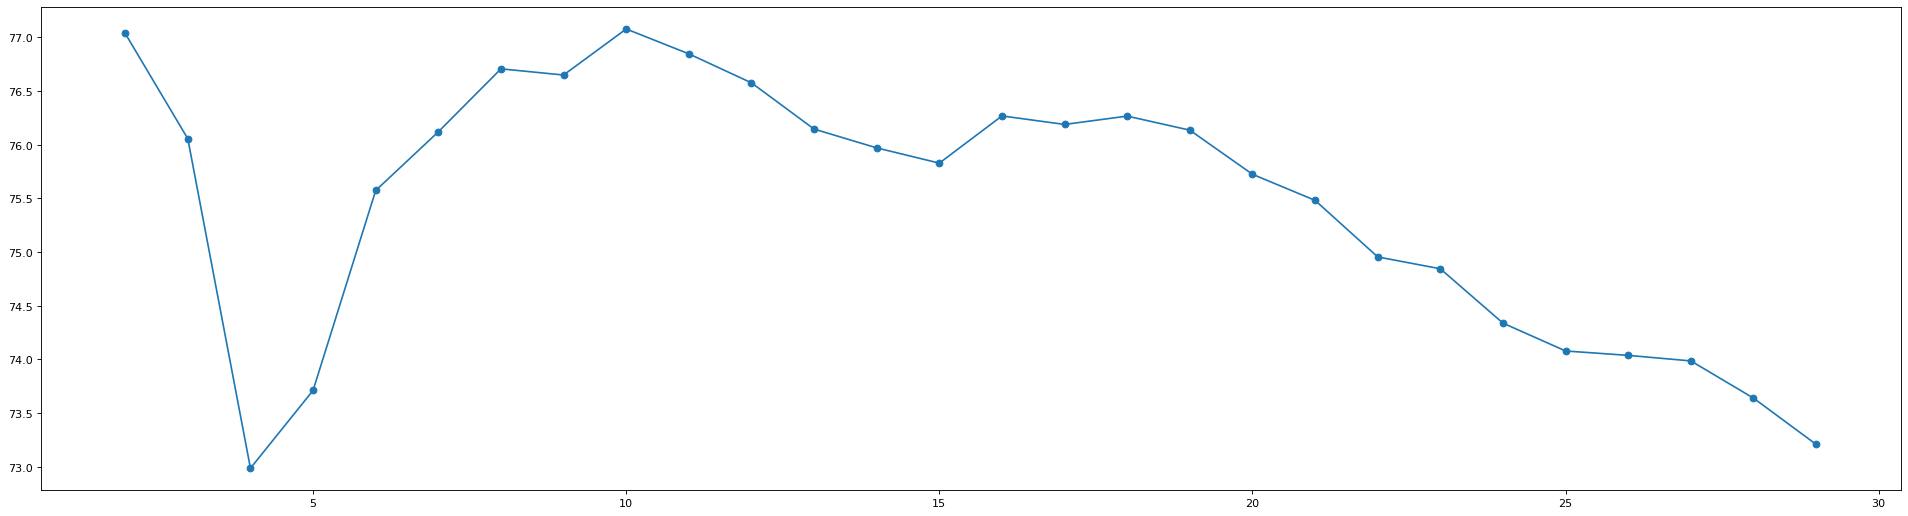

In [329]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((
        knn.fit(x_train, y_train).score(x_test, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

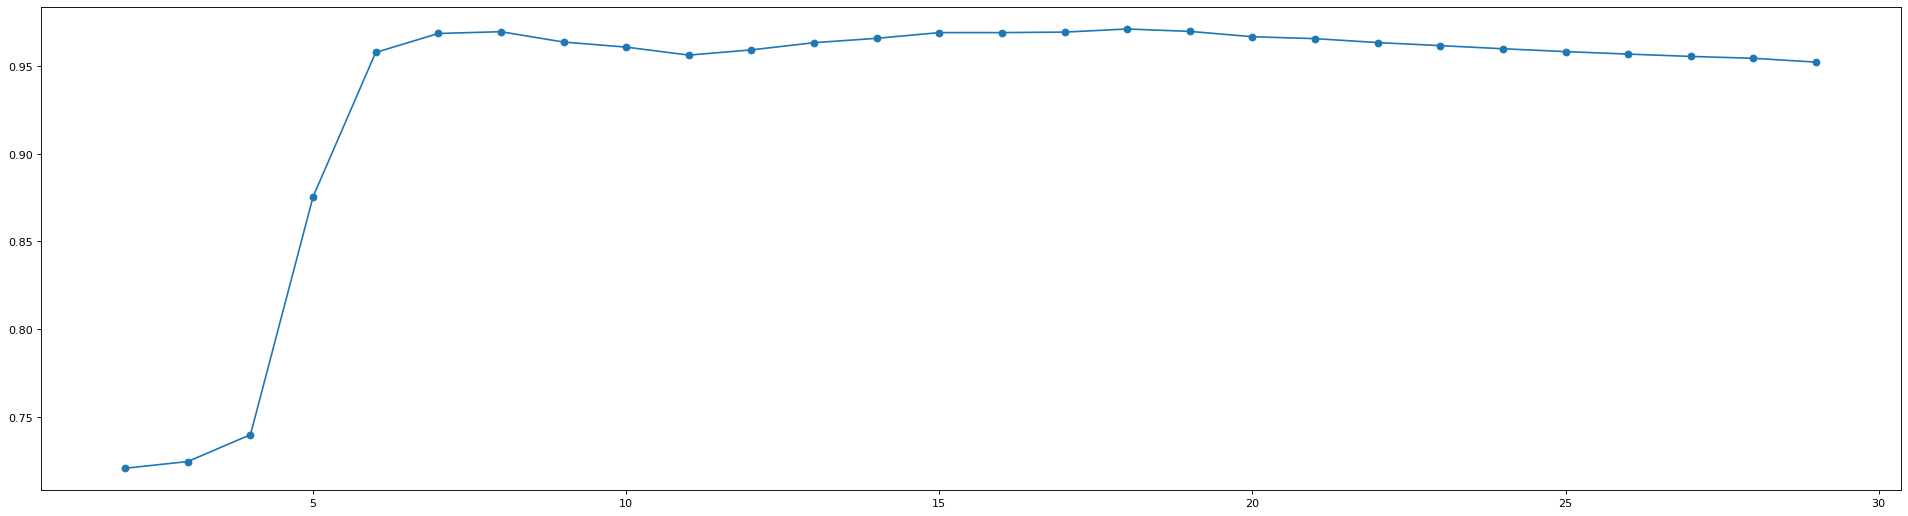

In [330]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    errors.append(np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(knn.predict(x_test)))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

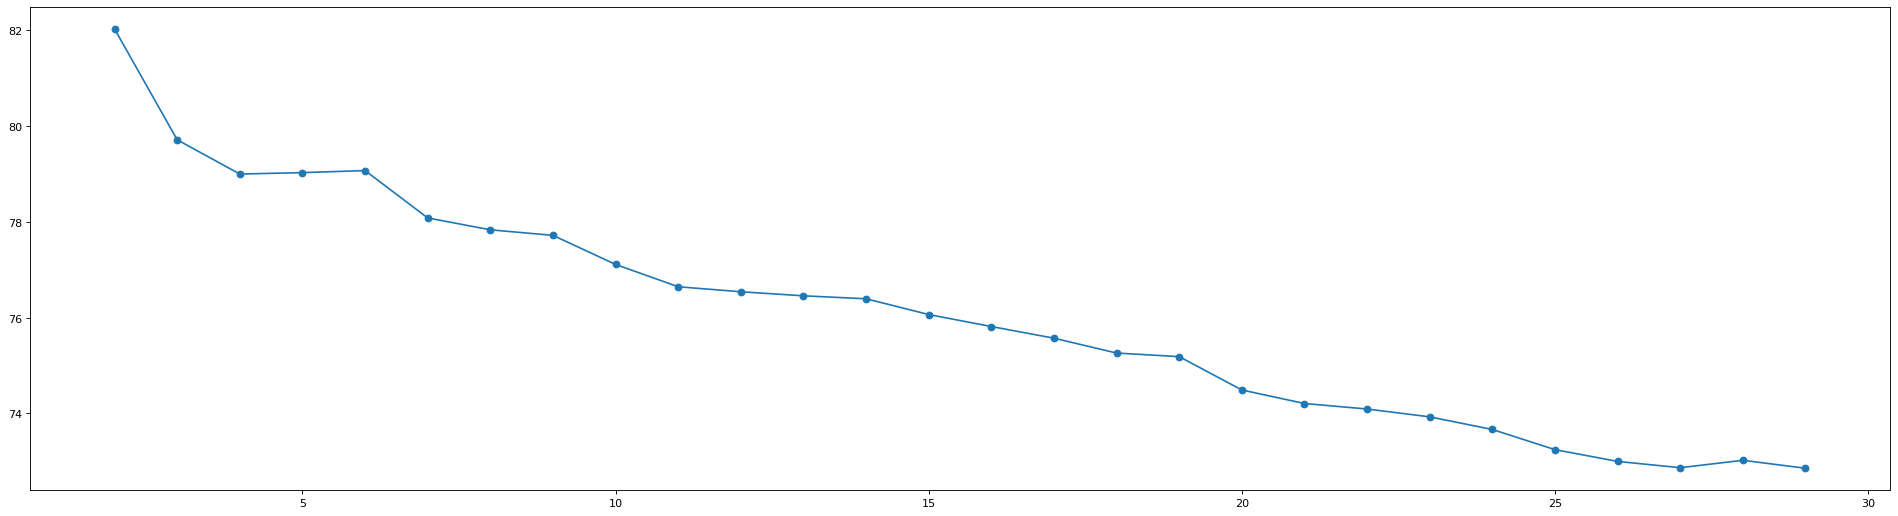

In [331]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((knn.fit(
        x_train_scaled, y_train).score(x_test_scaled, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

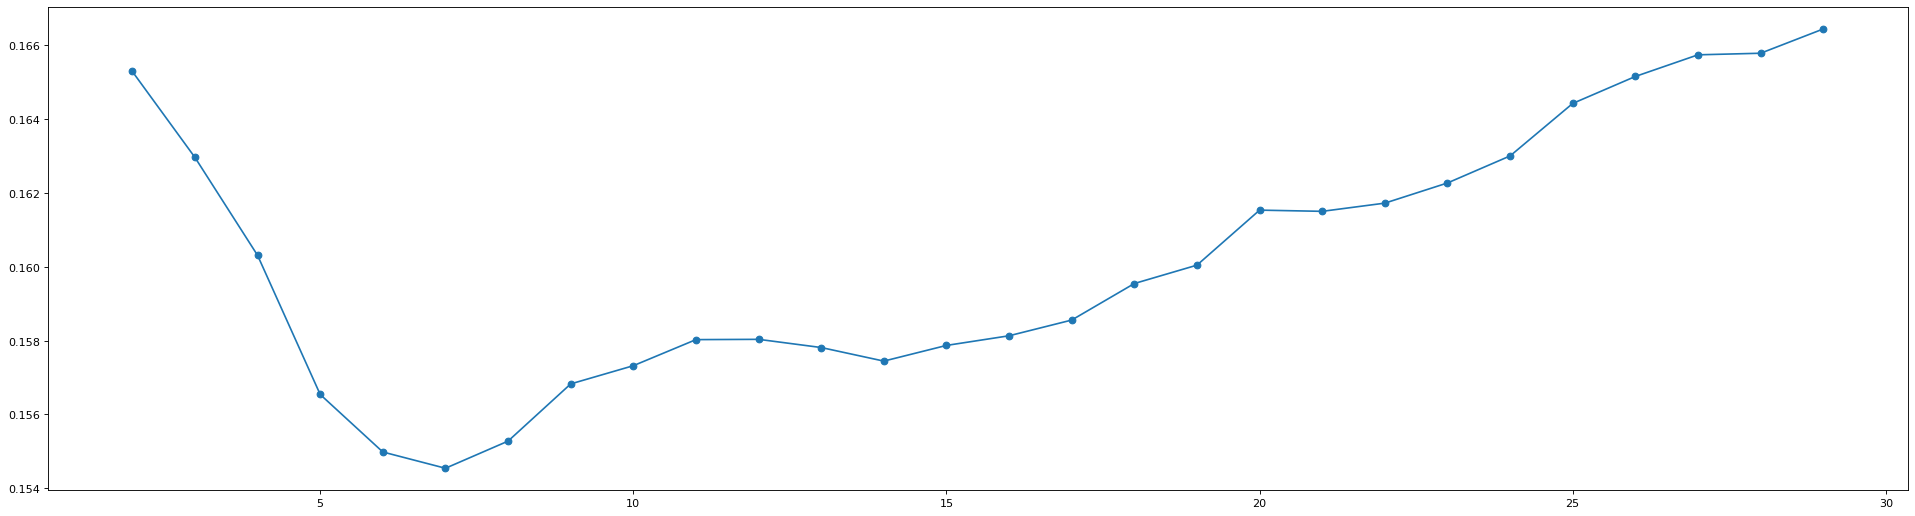

In [333]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    errors.append(np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(knn.predict(x_test_scaled)))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

### Random Forrest Regressor 

In [334]:
rdm = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rdm.fit(x_train_scaled, y_train)
rdm.score(x_test_scaled, y_test)

<ipython-input-334-83449e9522f2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train_scaled, y_train)


0.8612030810677602

In [335]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(rdm.predict(x_test_scaled))))

0.1376067717990384

In [336]:
rdm = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rdm.fit(x_train, y_train)
rdm.score(x_test, y_test)

<ipython-input-336-454ccf6fb374>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train, y_train)


0.8688609691388938

In [337]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(rdm.predict(x_test))))

0.1360678680860207

## SVR

In [338]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train_scaled, y_train)
regr_SVR.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.05370257666370004

In [339]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_SVR.predict(x_test_scaled))))

0.38661334706440953

In [340]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train, y_train)
regr_SVR.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.05304903741724187

In [341]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_SVR.predict(x_test))))

0.386495226015468

## GBoost

In [342]:
est = GradientBoostingRegressor(n_estimators=1000,
                                learning_rate=0.1, max_depth=1)
est.fit(x_train_scaled, y_train)
est.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9109187251949716

In [343]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(est.predict(x_test_scaled))))

0.12673738717169966

In [344]:
est.fit(x_train, y_train)
est.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9013004297700765

In [345]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(est.predict(x_test))))

0.13102048599301713

## SGD EGRESSO 

In [346]:
reg_sgd = SGDRegressor(max_iter=1000, tol=1e-3)
reg_sgd.fit(x_train, y_train)
reg_sgd.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-1.9454609361122383e+24

In [347]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(reg_sgd.predict(x_test))))

27.088551309620303

In [348]:
reg_sgd.fit(x_train_scaled, y_train)
reg_sgd.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7205003072070884

In [349]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(reg_sgd.predict(x_test_scaled))))

0.15387095232188513

## MLP

In [350]:
regr_mlp = MLPRegressor(random_state=1, max_iter=500)
regr_mlp.fit(x_train_scaled, y_train)
regr_mlp.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-4.026615117272951

In [351]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_mlp.predict(x_test_scaled))))

3.0101388923375367

In [352]:
regr_mlp.fit(x_train, y_train)
regr_mlp.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.596095013385133

In [353]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regr_mlp.predict(x_test))))

0.17813858471341282

## meilleur model

In [354]:
regressor = GradientBoostingRegressor(n_estimators=1000)
regressor.fit(x_train, y_train.values.ravel())
regressor.score(x_test, y_test.values.ravel())

0.9087593874563972

In [355]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regressor.predict(x_test))))

0.12599909354056743

In [356]:
regressor.fit(x_train_scaled, y_train.values.ravel())
regressor.score(x_test_scaled, y_test.values.ravel())

0.9152414845476662

In [357]:
np.sqrt(mean_squared_log_error(y_test,
                       np.absolute(regressor.predict(x_test_scaled))))

0.12156780136294967

In [358]:
y_train

,SalePrice
Id,
1293,107500
1019,160000
1214,145000
1431,192140
811,181000
...,...
764,337000
836,128000
1217,112000


### Grid Search

In [362]:
#creating Scoring parameter: 
scoring = 'r2'
# A sample parameter
parameters = {
    "loss":["squared_error", "absolute_error", 
            "huber", "quantile"],
    "learning_rate": [0.01, 0.025, 0.05, 
                      0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.05, 0.5, 12),
    "min_samples_leaf": np.linspace(0.05, 0.5, 12),
    "max_depth":[2, 3 ,5 , 8, 10, 15, 20],
    "max_features":["log2","sqrt", "auto"],
    "criterion": ["friedman_mse",  "mae", 
                  "mse", "squared_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 
                 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
clf = model_selection.GridSearchCV(
                                   GradientBoostingRegressor(), 
                                   parameters, 
                                   scoring=scoring, 
                                   cv=2, n_jobs=-1)



In [363]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
clf.fit(x_train, y_train.values.ravel())
#converting the clf.cv_results to dataframe
df = pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
clf.fit(x_train_scaled, y_train.values.ravel())
#converting the clf.cv_results to dataframe
df = pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_score_)
print(clf.best_params_)

In [ ]:
regressor = GradientBoostingRegressor(n_estimators=10000, 
                                      learning_rate= 0.2, 
                                      max_features= 'auto', 
                                      min_samples_leaf=0.05, 
                                      min_samples_split= 0.05, 
                                      subsample=0.95)
regressor.fit(x_train, y_train.values.ravel())
regressor.score(x_test, y_test.values.ravel())

# Feature importance 

### Random Forrest Regressor 

In [290]:
rdm = RandomForestRegressor(n_estimators=10000)
rdm.fit(x_train_scaled, y_train)
rdm.score(x_test_scaled, y_test)

<ipython-input-290-4efc97a55c20>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train_scaled, y_train)


0.8636225597955566

In [291]:
rdm = RandomForestRegressor(n_estimators=10000)
rdm.fit(x_train, y_train)
rdm.score(x_test, y_test)

<ipython-input-291-4b9406f22822>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train, y_train)


0.8657587494178445

# Feature importance

In [304]:
imp = rdm.feature_importances_*100
importance = pd.DataFrame(data=imp.flatten())

In [305]:
importance['features'] = features_v3

In [307]:
importance.columns = ['poids', 'feature']

In [308]:
sorted_importance = importance.sort_values(by='poids', ascending=False)
sorted_importance.values

array([[56.77283136311719, 'OverallQual'],
       [9.872589190710482, 'GrLivArea'],
       [3.010898801976755, 'TotalBsmtSF'],
       [2.5564933193939323, 'GarageCars'],
       [2.2840615157533346, 'BsmtFinSF1'],
       [2.1679481518413066, 'TotBsmtBaths'],
       [2.164545485297202, 'GarageArea'],
       [1.930256135751811, 'sum_floor'],
       [1.707853774143862, '2ndFlrSF'],
       [1.588242746894158, '1stFlrSF'],
       [1.4147222066971628, 'sum_BsmtFinSF1_BsmtFinSF2'],
       [1.198120285704129, 'LotArea'],
       [0.7624678738029403, 'sum_WoodDeckSF_OpenPorchSF'],
       [0.7163314635110221, 'YearBuilt'],
       [0.6210782448765245, 'MoSold'],
       [0.5841788192119948, 'spread_YrSold_YearBuilt'],
       [0.5143752723936218, 'YearRemodAdd'],
       [0.4685190902439183, 'KitchenQual'],
       [0.4620527264553565, 'spread_YrSold_YearRemodAdd'],
       [0.461823977394316, '%_KitchenAbvGr_TotRmsAbvGrd'],
       [0.45348392330657195, 'OverallCond'],
       [0.4452177408945034, '%_GrL

In [316]:
features_v4 = importance[importance['poids'] > 1]['feature'].values

# Model Training

In [317]:
target = ['SalePrice']
# Separating out the features
x = X_new_final_df.loc[:, features_v4]
# Separating out the target
y = data_final.loc[:, target]

In [318]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.75, random_state=0)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

## Linear Reression 

In [319]:
regr_s = linear_model.LinearRegression()
regr_s.fit(x_train, y_train)
regr_s.score(x_test, y_test)

0.6681831412232488

## Regression ridge

In [320]:
lrr = Ridge(alpha=0.1, max_iter=10000)
alphas = np.logspace(-6, 6, 200)

In [321]:
lrr.fit(x_train_scaled, y_train)
lrr.score(x_test_scaled, y_test)

0.6909786004055483

In [322]:
lrr.fit(x_train, y_train)
lrr.score(x_test, y_test)

0.6681721607874946

## Regression Lasso

In [323]:
from sklearn import linear_model
lrl = linear_model.Lasso(alpha=0.1, max_iter=10000)

In [324]:
lrl.fit(x_train, y_train)
lrl.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515256792965.7503, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.66818155773346

In [325]:
lrl.fit(x_train_scaled, y_train)
lrl.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31660776661.915405, tolerance: 679805682.3059437
  model = cd_fast.enet_coordinate_descent(


0.6886997712143148

## KNN Regressor

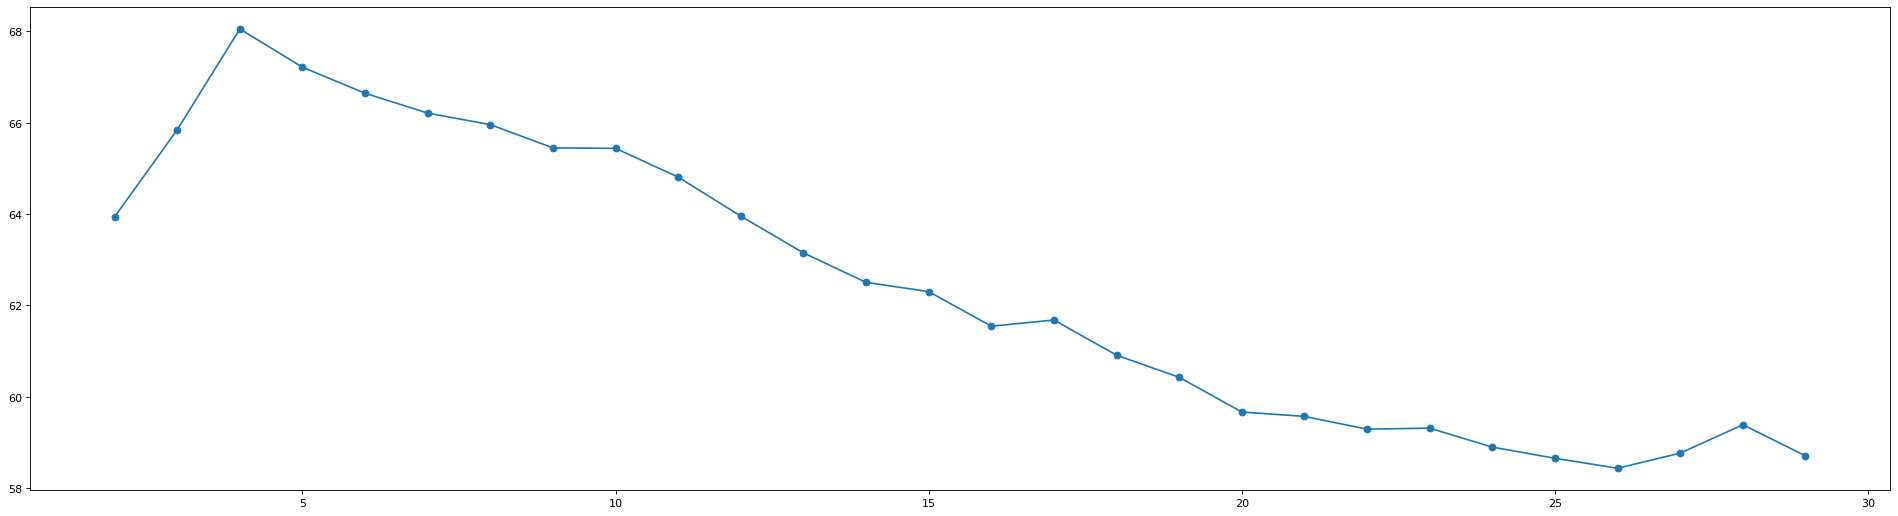

In [326]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((
        knn.fit(x_train, y_train).score(x_test, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

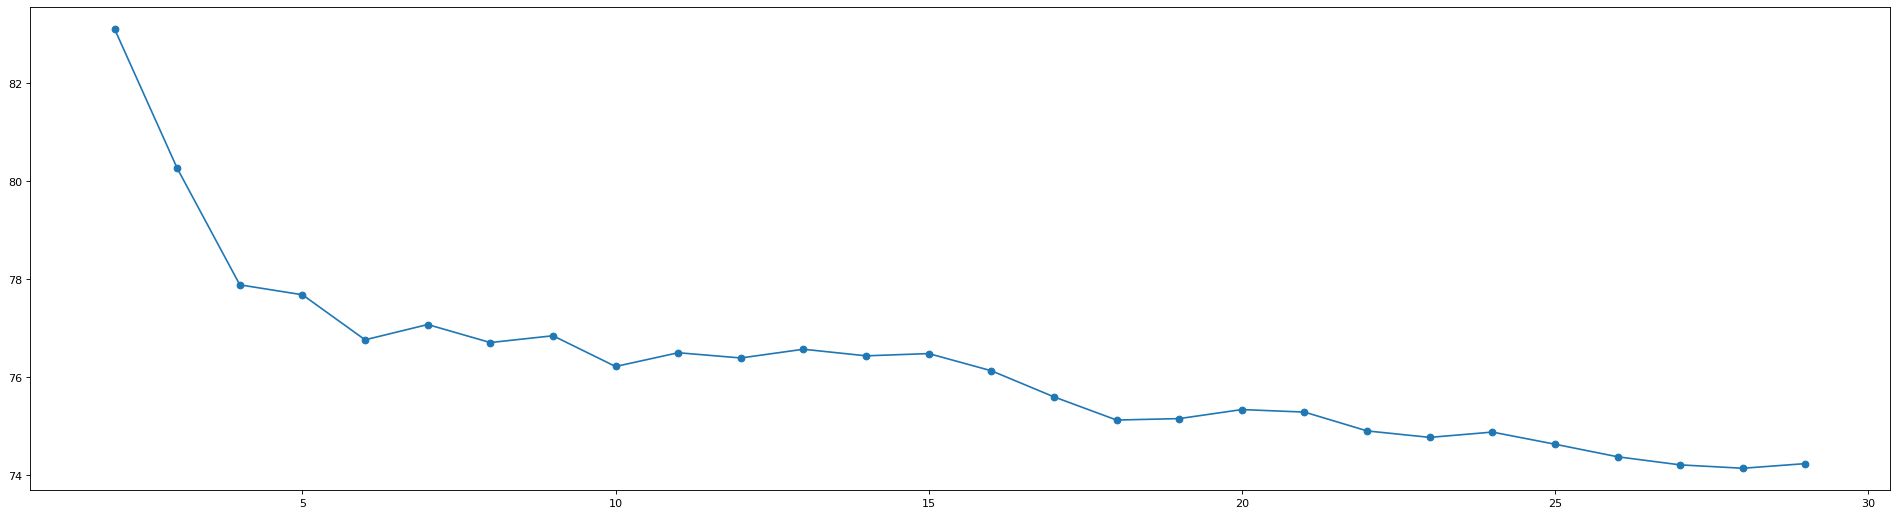

In [327]:
errors = []
for k in range(2, 30):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    errors.append(100*((knn.fit(
        x_train_scaled, y_train).score(x_test_scaled, y_test))))
figure(figsize=(30, 8), dpi=80)
plt.pyplot.plot(range(2, 30), errors, 'o-')

### Random Forrest Regressor 

In [328]:
rdm = RandomForestRegressor(n_estimators=10000)
rdm.fit(x_train_scaled, y_train)
rdm.score(x_test_scaled, y_test)

<ipython-input-328-4efc97a55c20>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train_scaled, y_train)


0.8634493050213022

In [329]:
rdm = RandomForestRegressor(n_estimators=10000)
rdm.fit(x_train, y_train)
rdm.score(x_test, y_test)

<ipython-input-329-4b9406f22822>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(x_train, y_train)


0.8623948874613796

## SVR

In [330]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train_scaled, y_train)
regr_SVR.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.052901596521184535

In [331]:
regr_SVR = SVR(C=1.0, epsilon=0.2)
regr_SVR.fit(x_train, y_train)
regr_SVR.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.054285897312398745

## GBoost

In [332]:
est = GradientBoostingRegressor(n_estimators=10000,
                                learning_rate=0.1, max_depth=1)
est.fit(x_train_scaled, y_train)
est.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8763342591965707

In [333]:
est.fit(x_train, y_train)
est.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8617708272461782

## SGD EGRESSO 

In [334]:
reg_sgd = SGDRegressor(max_iter=1000, tol=1e-3)
reg_sgd.fit(x_train, y_train)
reg_sgd.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-1.4542489513349045e+24

In [335]:
reg_sgd.fit(x_train_scaled, y_train)
reg_sgd.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6969416795417037

## MLP

In [336]:
regr_mlp = MLPRegressor(random_state=1, max_iter=500)
regr_mlp.fit(x_train_scaled, y_train)
regr_mlp.score(x_test_scaled, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-4.615477053515003

In [337]:
regr_mlp.fit(x_train, y_train)
regr_mlp.score(x_test, y_test)

C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\morgan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5347923674711483

### Grid Search

In [338]:
from sklearn import neighbors, metrics
from sklearn import model_selection
from sklearn import ensemble

# Fixer les valeurs des hyperparamètres à tester
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2' 

# Créer un regresseur forets aleatoires avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    ensemble.GradientBoostingRegressor(random_state = 0), # un regression forrets aléatoires
    parameters,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)


ValueError: too many values to unpack (expected 3)

In [ ]:

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(x_train , y_train.values.ravel())


In [ ]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_score_)
print(clf.best_params_)

In [339]:
regressor = GradientBoostingRegressor(n_estimators=10000)
regressor.fit(x_train, y_train.values.ravel())
regressor.score(x_test, y_test.values.ravel())

0.8740365155387826

In [340]:
regressor.fit(x_train_scaled, y_train.values.ravel())
regressor.score(x_test_scaled, y_test.values.ravel())

0.8741046428523328